<a href="https://colab.research.google.com/github/cvillarr123/marketingKPI/blob/main/CLASIFICACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#0.- Librerias 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split

from google.colab import drive
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
drive.mount('/content/drive')


import os
import json

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [ ]:
!pip uninstall scikit-learn -y
!pip install -U pycaret scikit-learn

import pycaret
print('Using PyCaret Version', pycaret.__version__)
print('Path to PyCaret: ', pycaret.__file__)

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 264 kB 4.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 1.3 MB 20.4 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 2.0 MB 59.4 MB/s 
     |████████████████████████████████| 80 kB 7.3 MB/s 
     |████████████████████████████████| 108 kB 52.2 MB/s 
     |████████████████████████████████| 14.4 MB 63 kB/s 
     |████████████████████████████████| 248 kB 7.2 MB/s 
     |████████████████████████████████| 167 kB 71.0 MB/s 
     |████████████████████████████████| 1.7 MB 75.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 271 kB 65.7 

Using PyCaret Version 2.3.3
Path to PyCaret:  /usr/local/lib/python3.7/dist-packages/pycaret/__init__.py


In [ ]:
!pip install shap


     |████████████████████████████████| 356 kB 4.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491649 sha256=366a5836f7431ecb06dd37156c7ff6b4f9b8c57e2ae1752815ef4832e008b407
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
!pip install kneed

In [ ]:
#path='/content/drive/My Drive/PROYECTO DATA SCIENCE/Data/DATA DRIVE.xlsx'
#data = pd.read_excel(path,sheet_name='EDAD Y GENERO')
path='DATA DRIVE.xlsx'
data = pd.read_excel(path,sheet_name='EDAD Y GENERO')

** Funciones para graficar en el dash**

In [ ]:
#para graficar los ROC

def grafica_roc_multiclase (col_y, col_score,  lista_etiqueta, modelo) :
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    from itertools import cycle
    from scipy import interp

    lw =2

    y = label_binarize( col_y, classes= lista_etiqueta)
    n_classes = y.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y[:, i], col_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), col_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])


    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='Curva ROC para clase {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Característica Operativa del Receptor ROC multiclase para ' + modelo)
    plt.legend(loc="lower right")
    plt.show()

 


In [ ]:
def grafica_roc_multiclase_v2 (data_pd, lista_etiqueta, nombre_col_y,  nombre_col_score) :

    from sklearn.metrics import roc_curve, auc
    y = label_binarize( data_pd[nombre_col_y], classes= lista_etiqueta)
    n_classes = y.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(data_pd[nombre_col_y][:, i], data_pd[nombre_col_y][:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(data_pd[nombre_col_y].ravel(), y_data_pd[nombre_col_y].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])




    fig = px.area(
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

In [ ]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
#train es el data frame
#count el conteo
#categorical_cols la lista de variables categoricas
#variable es la etiqueta adicional a poner en el grafico

#esta parte ponerla mas abajo reemplazando con los dataframe nuestros
#f=pd.melt(train,id_vars=['count'],value_vars=categorical_cols)
#g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False)
#g.map(boxplot,'value','count')

In [ ]:
#graficar las columnas numericas en solo dolor
#lista de columnas numericas  numerical_cols
#sns.pairplot(train[[*numerical_cols,'count']])

In [ ]:
# graficar dos tipos de grafico de barras de las categorias
# pasas la columna de las categorias en eje x
def graficar_categorias_vs_objetivo(data, x_col, y_col, tipo_grafico) :
  import plotly.express as px
  if (len(tipo_grafico) >= 1 and tipo_grafico[0] == 1)  :
    fig2 = px.histogram(data, x=x_col, y=y_col, histfunc='sum', height=300,
                        title='Histograma')
    fig2.show()
  if (len(tipo_grafico) >= 2 and tipo_grafico[0] == 1)  :  
    fig1 = px.bar(data, x=x_col, y=y_col, height=300,
                  title='Grafico barras apiladas - Hover on individual items')
    fig1.show()

In [ ]:
def dibujar_box_plot(datos, x_col, y_col, orientacion) :
     sns.boxplot(y= datos[x_col] , x= datos[y_col], orient=orientacion)

# ejemplo 
# dibujar_box_plot(data, 'Costperon-Facebooklead', 'Clasificacion', 'v')     

In [ ]:
def graficar_countplot ( datos, x_col, y_col, paleta ) :
  chart = sns.countplot(x=x_col, data=datos, palette=paleta)
  chart.set_xticklabels(chart.get_xticklabels(), fontsize=7)
  chart.set(xlabel=x_col, ylabel=y_col)
  plt.show()

# 0.- Transformacion y limpieza

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             3031 non-null   int64  
 1   Year & month                     3031 non-null   object 
 2   Month                            3031 non-null   int64  
 3   Campaign ID                      3031 non-null   int64  
 4   Campaign name                    3031 non-null   object 
 5   Campaign objective               3031 non-null   object 
 6   Ad set ID                        3031 non-null   int64  
 7   Ad set name                      3031 non-null   object 
 8   Ad ID                            3031 non-null   int64  
 9   Ad name                          3031 non-null   object 
 10  Promoted post type               3031 non-null   object 
 11  Promoted post created date       3031 non-null   int64  
 12  Promoted post descri

Eliminar NA

In [ ]:
filter1 = data.Year == 2021  
filter2 = data.Age != 'unknown'
filter3 = data.Gender != 'unknown'
filter4 = data["Campaign objective"] == "LEAD_GENERATION"

##filter3 = df_inicial.Month.isin([4,5,6,7])  
data = data[  filter1 & filter2 & filter3 & filter4 ]
data.head(5)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead
0,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,female,0.00,4,4,1.00,0,0,0.00,NaN
1,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,0.10,69,56,1.23,0,0,1.45,NaN
2,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,0.19,18,18,1.00,0,0,10.56,NaN
3,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32
4,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,0.04,17,13,1.31,0,0,2.35,NaN


In [ ]:
data=data.dropna(subset = ["Cost per on-Facebook lead"])
data=data.dropna(subset = ["Promoted post description"])

In [ ]:
missing_values_count = data.isnull().sum()
missing_values_count[0:43]

Year                                 0
Year & month                         0
Month                                0
Campaign ID                          0
Campaign name                        0
Campaign objective                   0
Ad set ID                            0
Ad set name                          0
Ad ID                                0
Ad name                              0
Promoted post type                   0
Promoted post created date           0
Promoted post description            0
Promoted post message                0
Promoted post caption                0
Ad set start time                    0
Ad set end time                    472
Ad set targeting                     0
Targeting minimum age                0
Targeting maximum age                0
Age                                  0
Gender                               0
Cost                                 0
Impressions                          0
Reach                                0
Frequency                

Etiquetado Manual 

In [ ]:
data =data.dropna(subset=["Cost per on-Facebook lead"])
q1= np.percentile(data["Cost per on-Facebook lead"], 25)  
q2= np.percentile(data["Cost per on-Facebook lead"], 50)
q3= np.percentile(data["Cost per on-Facebook lead"], 75) 

data['Clasificacion'] = "Ninguno"
data['ClasificacionDes'] = 'Ninguno'
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']<= q1)] = 2  #"Mejores"
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']> q1 ) & (data['Cost per on-Facebook lead'] <= q3)] = 1 # "Regulares"
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']> q3 )] = 0 #"Peores"


data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']<= q1)] = "Mejores"
data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']> q1 ) & (data['Cost per on-Facebook lead'] <= q3)] = "Regulares"
data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']> q3 )] = "Peores"

data['Clasificacion']= data['Clasificacion'].astype('int')


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

**Caracteristicas o variables predictoras calculados**

In [ ]:
data['Descripcion'] = data['Promoted post description'] 
data['Message'] = data['Promoted post message'] 
data['Caption'] = data['Promoted post caption'] 
data['NumDescripcion'] = data.Descripcion.str.split().str.len()
data['NumMessage'] = data.Message.str.split().str.len()
data['NumCaption'] = data.Caption.str.split().str.len()

In [ ]:
data['Rate'] = data['Unique leads']/data['Reach'] 
data['CTR'] = data['Link clicks']/data['Impressions'] 

In [ ]:
data.head(2)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,ClasificacionDes,Descripcion,Message,Caption,NumDescripcion,NumMessage,NumCaption,Rate,CTR
3,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,2,Mejores,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2,25,6,0.005181,0.013274
13,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,Regulares,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2,48,2,0.001188,0.003038


**Creacion de variables categoricas del campo intereses y nivel educacion**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

data['intereses'] = '0' 
#data['education_statuses'] = '0'

data['ComprasOnline'] = '0'
data['Seguridad'] = '0'
data['SeguridadAlarmas'] = '0'
data['DispositivoInteligente'] = '0'
data['DispositivosGPS'] = '0'
data['SmartTechnologies'] = '0'
data['TarjetasCredito'] = '0'
data['Transporte'] = '0'
data['Vehiculos'] = '0'
#data['ServicioTecnico'] ='0'
ComprasOnline = ['Compras online']
Seguridad = ['Seguridad', 'Security', 'Sistema de alarma']
SeguridadAlarmas = ['Anti-theft system', 'Security alarm', 'Sistema de alarma']
DispositivoInteligente = ['Dispositivo inteligente']
DispositivosGPS = ['Dispositivos GPS','GPS Asistido','Conducción','Google Maps','Vehicle tracking system']
SmartTechnologies = ['Smart Technologies']
TarjetasCredito = ['Tarjetas de crédito']
Vehiculos = ['Sector automotor','Vehículos','Automóviles','Carros','Chevrolet','Dispositivos GPS','Honda','Mantenimiento preventivo','Motocicletas','Seguridad vial','Tarjetas de crédito','Toyota','Volkswagen']
Transporte = ['Transporte']
#ServicioTecnico = ['Servicios técnicos y de TI']
#education_statuses = ['10']

for i in data.index:

  #if (i == 3):
    campo_json = json.loads(data.loc[i]['Ad set targeting'])
    #print(campo_json)
    #hay registros que no tienen en el json el flexible_spec
    try:
        lista_intereses = pd.get_dummies(pd.json_normalize( campo_json ,record_path=['flexible_spec','interests'],errors='ignore').rename(columns={'name': 'interes'})['interes']).columns.values.tolist()
        #lista_educacion = pd.json_normalize(cuack_json,record_path=['flexible_spec'],errors='ignore')['education_statuses'][0]
        cadena_interes = '| ' + ''.join([  str( item + ' | ') for item in lista_intereses ])
        #print(cadena_interes)
        #cadena_educacion = '| ' + ''.join([  str( str(item) + ' | ') for item in lista_educacion ])
        data['intereses'][data.index == i] = cadena_interes

        if any(x in cadena_interes  for x in ComprasOnline) :
             data['ComprasOnline'][data.index == i] = '1'
        else :
             data['ComprasOnline'][data.index == i] = '0'

        if any(x in cadena_interes for x in Seguridad ) :
             data['Seguridad'][data.index == i] = '1'
        else :
             data['Seguridad'][data.index == i] = '0'

        if any(x in cadena_interes  for x in SeguridadAlarmas) :
             data['SeguridadAlarmas'][data.index == i] = '1'
        else :
             data['SeguridadAlarmas'][data.index == i] = '0'

        if any(x in cadena_interes  for x in DispositivoInteligente ) :
             data['DispositivoInteligente'][data.index == i] = '1'
        else :
             data['DispositivoInteligente'][data.index == i] = '0'

        if any(x in cadena_interes  for x in DispositivosGPS ) :
             data['DispositivosGPS'][data.index == i] = '1'
        else :
             data['DispositivosGPS'][data.index == i] = '0'

        if any(x in cadena_interes  for x in SmartTechnologies ) :
             data['SmartTechnologies'][data.index == i] = '1'
        else :
             data['SmartTechnologies'][data.index == i] = '0'

        if any(x in cadena_interes  for x in TarjetasCredito ) :
             data['TarjetasCredito'][data.index == i] = '1'
        else :
             data['TarjetasCredito'][data.index == i] = '0'

        if any(x in cadena_interes  for x in Transporte ) :
             data['Transporte'][data.index == i] = '1'
        else :
             data['Transporte'][data.index == i] = '0'

        if any(x in cadena_interes  for x in Vehiculos ) :
             data['Vehiculos'][data.index == i] = '1'
        else :
             data['Vehiculos'][data.index == i] = '0'


        #if any(x in education_statuses for x in cadena_educacion) :
        #     data['education_statuses'][data.index == i] = '1'
        #else :
        #     data['education_statuses'][data.index == i] = '0'


    except:
        #print('no entra')
        data.loc[i]['intereses'] = '0' 
        #data.loc[i]['education_statuses'] = '0' 
        data.loc[i]['ComprasOnline'] = '0'
        data.loc[i]['Seguridad'] = '0'
        data.loc[i]['SeguridadAlarmas'] = '0'
        data.loc[i]['DispositivoInteligente'] = '0'
        data.loc[i]['DispositivosGPS'] = '0'
        data.loc[i]['SmartTechnologies'] = '0'
        data.loc[i]['TarjetasCredito'] = '0'
        data.loc[i]['Vehiculos'] = '0'
        data.loc[i]['Transporte'] = '0'
        


In [ ]:
#Transformar a enteros
#data['education_statuses'] = data['education_statuses'].astype('int')
data['ComprasOnline'] = data['ComprasOnline'].astype('int')
data['Seguridad'] = data['Seguridad'].astype('int')
data['SeguridadAlarmas'] = data['SeguridadAlarmas'].astype('int')
data['DispositivoInteligente'] = data['DispositivoInteligente'].astype('int')
data['DispositivosGPS'] = data['DispositivosGPS'].astype('int')
data['SmartTechnologies'] = data['SmartTechnologies'].astype('int')
data['TarjetasCredito'] = data['TarjetasCredito'].astype('int')
data['Vehiculos'] = data['Vehiculos'].astype('int')
data['Transporte'] = data['Transporte'].astype('int')


In [ ]:
np.unique (data['DispositivosGPS'])

array([0, 1])

In [ ]:
data.head(2)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,ClasificacionDes,Descripcion,Message,Caption,NumDescripcion,NumMessage,NumCaption,Rate,CTR,intereses,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos
3,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,2,Mejores,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2,25,6,0.005181,0.013274,| Anti-theft system | Compras online | Conducc...,1,1,1,1,1,1,1,1,1
13,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,Regulares,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2,48,2,0.001188,0.003038,| Anti-theft system | Compras online | Conducc...,1,1,1,1,1,1,1,1,1


**Creacion de variables TF y IDF**

https://www.kaggle.com/vbmokin/nlp-eda-bag-of-words-tf-idf-glove-bert

https://sci2lab.github.io/ml_tutorial/tfidf/

https://www.kaggle.com/baguette059/machine-learning

https://www.kaggle.com/cinthyavergara/nltk-sentiment-and-segmentation-analysis-comments

https://www.kaggle.com/baguette059/machine-learning


In [ ]:
!pip install keras

In [ ]:

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud
from collections import defaultdict
from collections import Counter

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
#from keras.optimizers import Adam
import torch

import warnings
warnings.simplefilter('ignore')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
    
data['length'] = data['Promoted post message'].apply(length)

In [ ]:
#plt.rcParams['figure.figsize'] = (18.0, 6.0)
#bins = 150
#plt.hist(data[data['Clasificacion'] == 2]['length'], alpha = 0.6, bins=bins, label='2')
#plt.hist(data[data['Clasificacion'] == 1]['length'], alpha = 0.8, bins=bins, label='1')
#plt.hist(data[data['Clasificacion'] == 0]['length'], alpha = 0.8, bins=bins, label='0')
#plt.xlabel('length')
#plt.ylabel('numbers')
#plt.legend(loc='upper right')
#plt.xlim(0,150)
#plt.grid()
#plt.show()

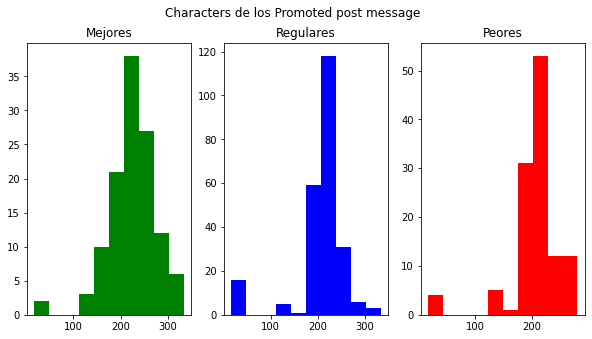

In [ ]:
fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(10,5))

data_len=data[data['Clasificacion']==2]['Promoted post message'].str.len()
ax0.hist(data_len,color='green')
ax0.set_title('Mejores')

data_len=data[data['Clasificacion']==1]['Promoted post message'].str.len()
ax1.hist(data_len,color='blue')
ax1.set_title('Regulares')

data_len=data[data['Clasificacion']==0]['Promoted post message'].str.len()
ax2.hist(data_len,color='red')
ax2.set_title('Peores')


fig.suptitle('Characters de los Promoted post message  ')
plt.show()

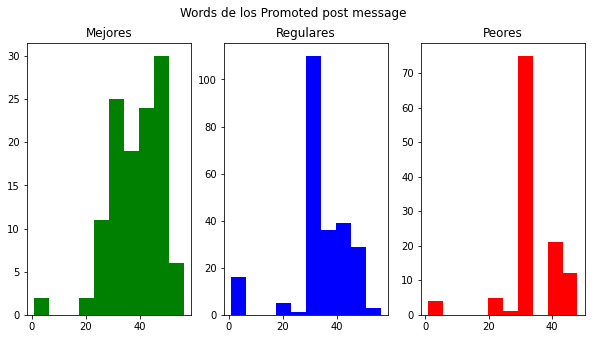

In [ ]:

fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(10,5))

data_len=data[data['Clasificacion']==2]['Promoted post message'].str.split().map(lambda x: len(x))
ax0.hist(data_len,color='green')
ax0.set_title('Mejores')

data_len=data[data['Clasificacion']==1]['Promoted post message'].str.split().map(lambda x: len(x))
ax1.hist(data_len,color='blue')
ax1.set_title('Regulares')

data_len=data[data['Clasificacion']==0]['Promoted post message'].str.split().map(lambda x: len(x))
ax2.hist(data_len,color='red')
ax2.set_title('Peores')


fig.suptitle('Words de los Promoted post message  ')
plt.show()

In [ ]:
def create_corpus(Clasificacion):
    corpus=[]
    
    for x in data[data['Clasificacion']==Clasificacion]['Promoted post message'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
def create_corpus_df(data, Clasificacion):
    corpus=[]
    
    for x in data[data['Clasificacion']==Clasificacion]['Promoted post message'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

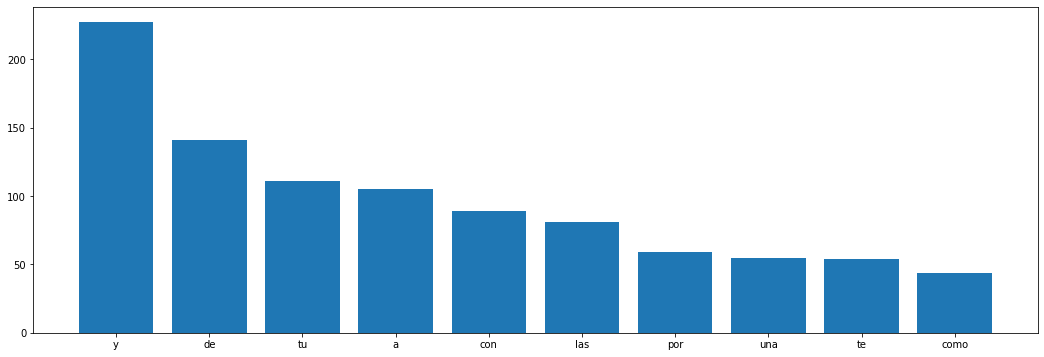

In [ ]:
# stopwords comunes en los message de las publicaciones 

corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

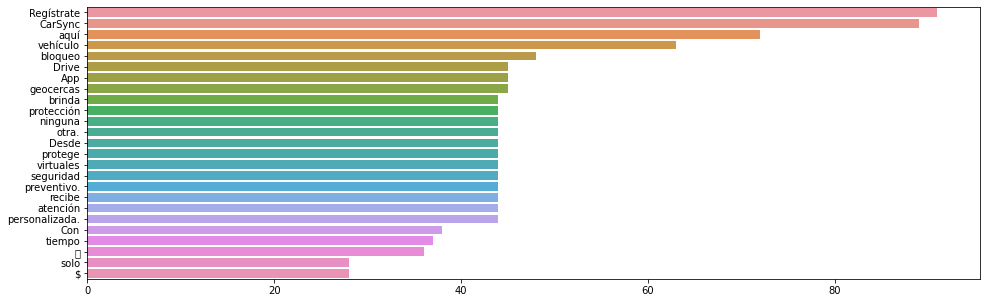

In [ ]:
plt.figure(figsize=(16,5))
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        sns.barplot(x=y,y=x)

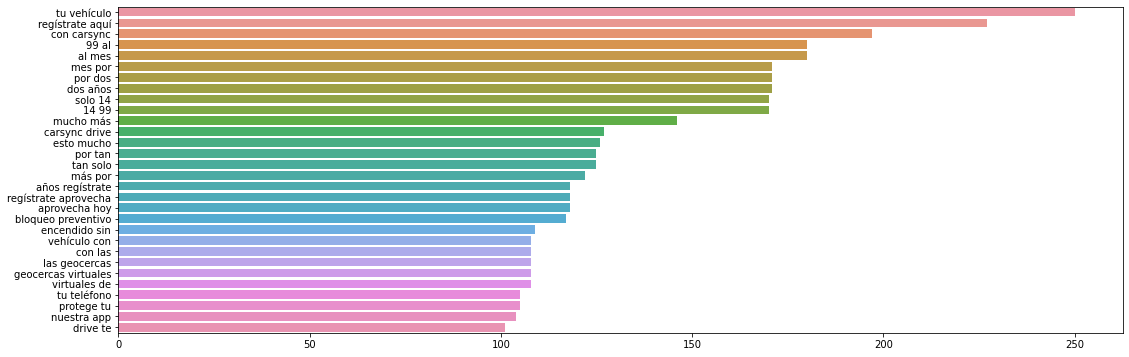

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

    plt.figure(figsize=(16,5))


top_tweet_bigrams=get_top_tweet_bigrams(data['Promoted post message'])[:30]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

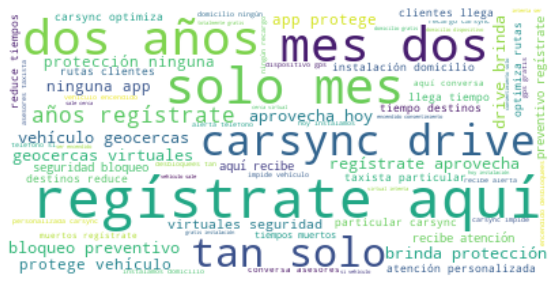

In [ ]:
# WordCloud

text = ' '.join(data['Promoted post message'].str.lower())

wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=1500).generate(text)
#wordcloud.most_common(20)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Construcción de la matriz Palabra-Documento


TF IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
data['message']=data['Promoted post message']
count_vect = CountVectorizer(stop_words=stop)
X_train_counts = count_vect.fit_transform(data.message)
X_train_counts.shape

(476, 261)

In [ ]:
# CountVectorizer supports counts of N-grams of words or consecutive characters.
# Once fitted, the vectorizer has built a dictionary of feature indices:
count_vect.vocabulary_
count_vect.get_feature_names()

['100',
 '13',
 '14',
 '20',
 '24',
 '99',
 'acceda',
 'accede',
 'acceder',
 'acelerados',
 'activa',
 'activar',
 'además',
 'adiós',
 'adquiérelo',
 'ajeno',
 'alerta',
 'alertas',
 'alguien',
 'algún',
 'alrededor',
 'alta',
 'amas',
 'apertura',
 'aplicación',
 'app',
 'aprovecha',
 'aquí',
 'asesores',
 'asistencia',
 'atención',
 'aumentar',
 'auto',
 'avisarán',
 'años',
 'bloqueado',
 'bloqueo',
 'bloqueos',
 'botón',
 'brand',
 'brinda',
 'bruscos',
 'cada',
 'carro',
 'carsync',
 'carsyncdrive',
 'celular',
 'cerca',
 'clientes',
 'coche',
 'combustible',
 'comienza',
 'compra',
 'conduce',
 'conduzca',
 'conoce',
 'conocer',
 'consentimiento',
 'consumido',
 'control',
 'controlar',
 'conversa',
 'crédito',
 'cualquier',
 'cuentas',
 'cuida',
 'cuidado',
 'cuidamos',
 'cuidar',
 'cómo',
 'da',
 'dale',
 'deja',
 'dejar',
 'dentro',
 'desbloquear',
 'desbloquees',
 'desbloqueo',
 'desconfianza',
 'descubre',
 'descuento',
 'destinos',
 'dile',
 'dinero',
 'dirige',
 'disposi

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
#TF
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(476, 261)

In [ ]:
X_train_tf[1:12]

<11x261 sparse matrix of type '<class 'numpy.float64'>'
	with 270 stored elements in Compressed Sparse Row format>

In [ ]:
#TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape#TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(476, 261)

https://www.kaggle.com/cinthyavergara/nltk-sentiment-and-segmentation-analysis-comments

# 1.-  AEDA

In [ ]:
data.dtypes

Year                                 int64
Year & month                        object
Month                                int64
Campaign ID                          int64
Campaign name                       object
Campaign objective                  object
Ad set ID                            int64
Ad set name                         object
Ad ID                                int64
Ad name                             object
Promoted post type                  object
Promoted post created date           int64
Promoted post description           object
Promoted post message               object
Promoted post caption               object
Ad set start time                    int64
Ad set end time                    float64
Ad set targeting                    object
Targeting minimum age                int64
Targeting maximum age                int64
Age                                 object
Gender                              object
Cost                               float64
Impressions

In [ ]:
data.describe()

,Year,Month,Campaign ID,Ad set ID,Ad ID,Promoted post created date,Ad set start time,Ad set end time,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos
count,476.0,476.000000,4.760000e+02,4.760000e+02,4.760000e+02,476.000000,476.000000,4.0,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,2021.0,4.193277,2.384593e+16,2.384635e+16,2.384679e+16,44334.901261,44175.512605,44364.0,22.432773,56.138655,14.374370,7330.718487,4224.294118,1.541786,41.088235,5.735294,2.322668,2.383256,1.002101,6.792017,34.491597,5.676471,0.004501,0.009135,0.808824,0.497899,0.428571,0.401261,0.525210,0.401261,0.888655,0.401261,0.915966
std,0.0,2.025219,1.680774e+11,7.915021e+11,6.676882e+11,33.310228,103.190605,0.0,1.454466,9.925072,25.172324,13626.452709,7092.997162,0.432234,67.071655,9.044294,1.575707,1.769113,0.706359,3.097167,10.284067,2.326134,0.018485,0.015230,0.393641,0.500522,0.495392,0.490669,0.499889,0.490669,0.314889,0.490669,0.277730
min,2021.0,1.000000,2.384591e+16,2.384591e+16,2.384591e+16,44272.000000,44118.000000,44364.0,18.000000,44.000000,0.020000,4.000000,3.000000,1.000000,1.000000,1.000000,0.750000,0.020000,0.000000,1.000000,1.000000,1.000000,0.000232,0.001137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,2.000000,2.384591e+16,2.384591e+16,2.384615e+16,44327.000000,44118.000000,44364.0,21.000000,44.000000,1.867500,807.750000,568.000000,1.230000,5.000000,1.000000,1.530000,1.277500,1.000000,5.000000,30.000000,4.000000,0.000947,0.004347,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2021.0,4.000000,2.384591e+16,2.384591e+16,2.384664e+16,44327.000000,44118.000000,44364.0,23.000000,65.000000,4.920000,2607.500000,1696.500000,1.440000,15.000000,2.000000,1.955000,2.025000,1.000000,7.000000,31.000000,6.000000,0.001529,0.005932,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,2021.0,6.000000,2.384591e+16,2.384603e+16,2.384748e+16,44362.000000,44138.000000,44364.0,23.000000,65.000000,15.382500,8261.750000,5047.500000,1.712500,44.000000,6.000000,2.732500,3.100000,1.250000,7.000000,40.000000,7.000000,0.003013,0.009790,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2021.0,7.000000,2.384775e+16,2.384805e+16,2.384808e+16,44399.000000,44396.000000,44364.0,25.000000,65.000000,214.980000,147944.000000,67398.000000,3.900000,516.000000,68.000000,27.500000,11.390000,2.000000,12.000000,56.000000,9.000000,0.333333,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


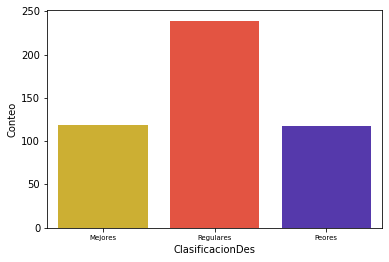

In [ ]:
#sns.countplot(x="Clasificacion", data=data, palette="bwr")
#plt.show()

graficar_countplot(data,'ClasificacionDes','Conteo','CMRmap_r')

In [ ]:
pd.unique(data['Promoted post type'])

array(['link'], dtype=object)

In [ ]:
all_features = ['Targeting minimum age', 'Targeting maximum age', 'Age', 'Gender','Cost', 'Impressions', 'Reach', 'Link clicks', 'Unique leads','CPM (cost per 1000 impressions)', 'Cost per on-Facebook lead','NumDescripcion', 'NumMessage', 'NumCaption', 'Rate','CTR', 'education_statuses', 'ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte']
categorical_columns_txt = ['Age', 'Gender']
categorical_columns_int = ['ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte','Vehiculos']
categorical_columns = ['Age', 'Gender', 'ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte','Vehiculos']
numerical_columns = ['Targeting minimum age', 'Targeting maximum age','NumDescripcion', 'NumMessage', 'NumCaption', 'Rate','CTR']
features_columns =  ['Targeting minimum age', 'Targeting maximum age','NumDescripcion', 'NumMessage', 'NumCaption', 'Rate','CTR','Age', 'Gender','education_statuses', 'ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte']
labels = ['Clasificacion']

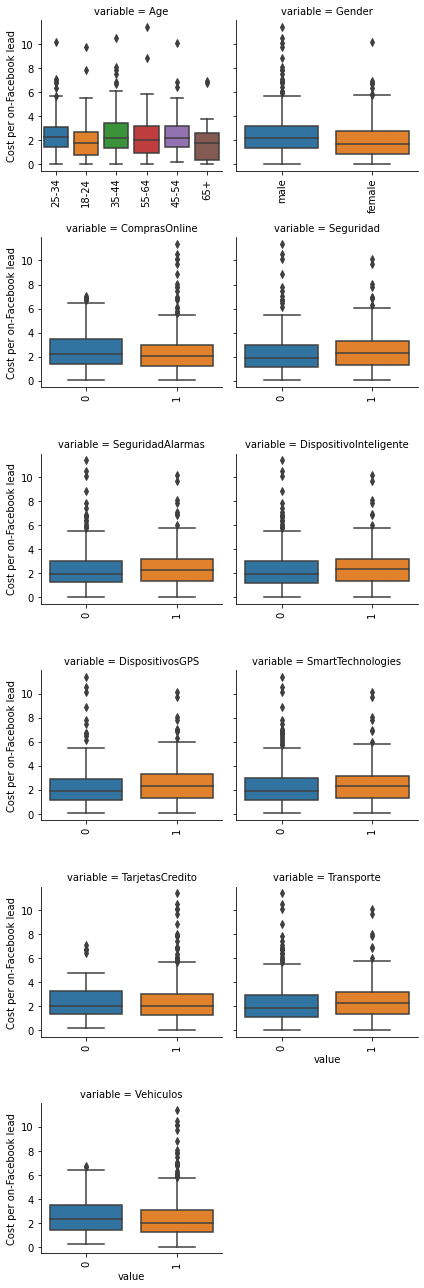

In [ ]:
f=pd.melt (data,id_vars=['Cost per on-Facebook lead'],value_vars=categorical_columns)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False)
g.map(boxplot,'value','Cost per on-Facebook lead')

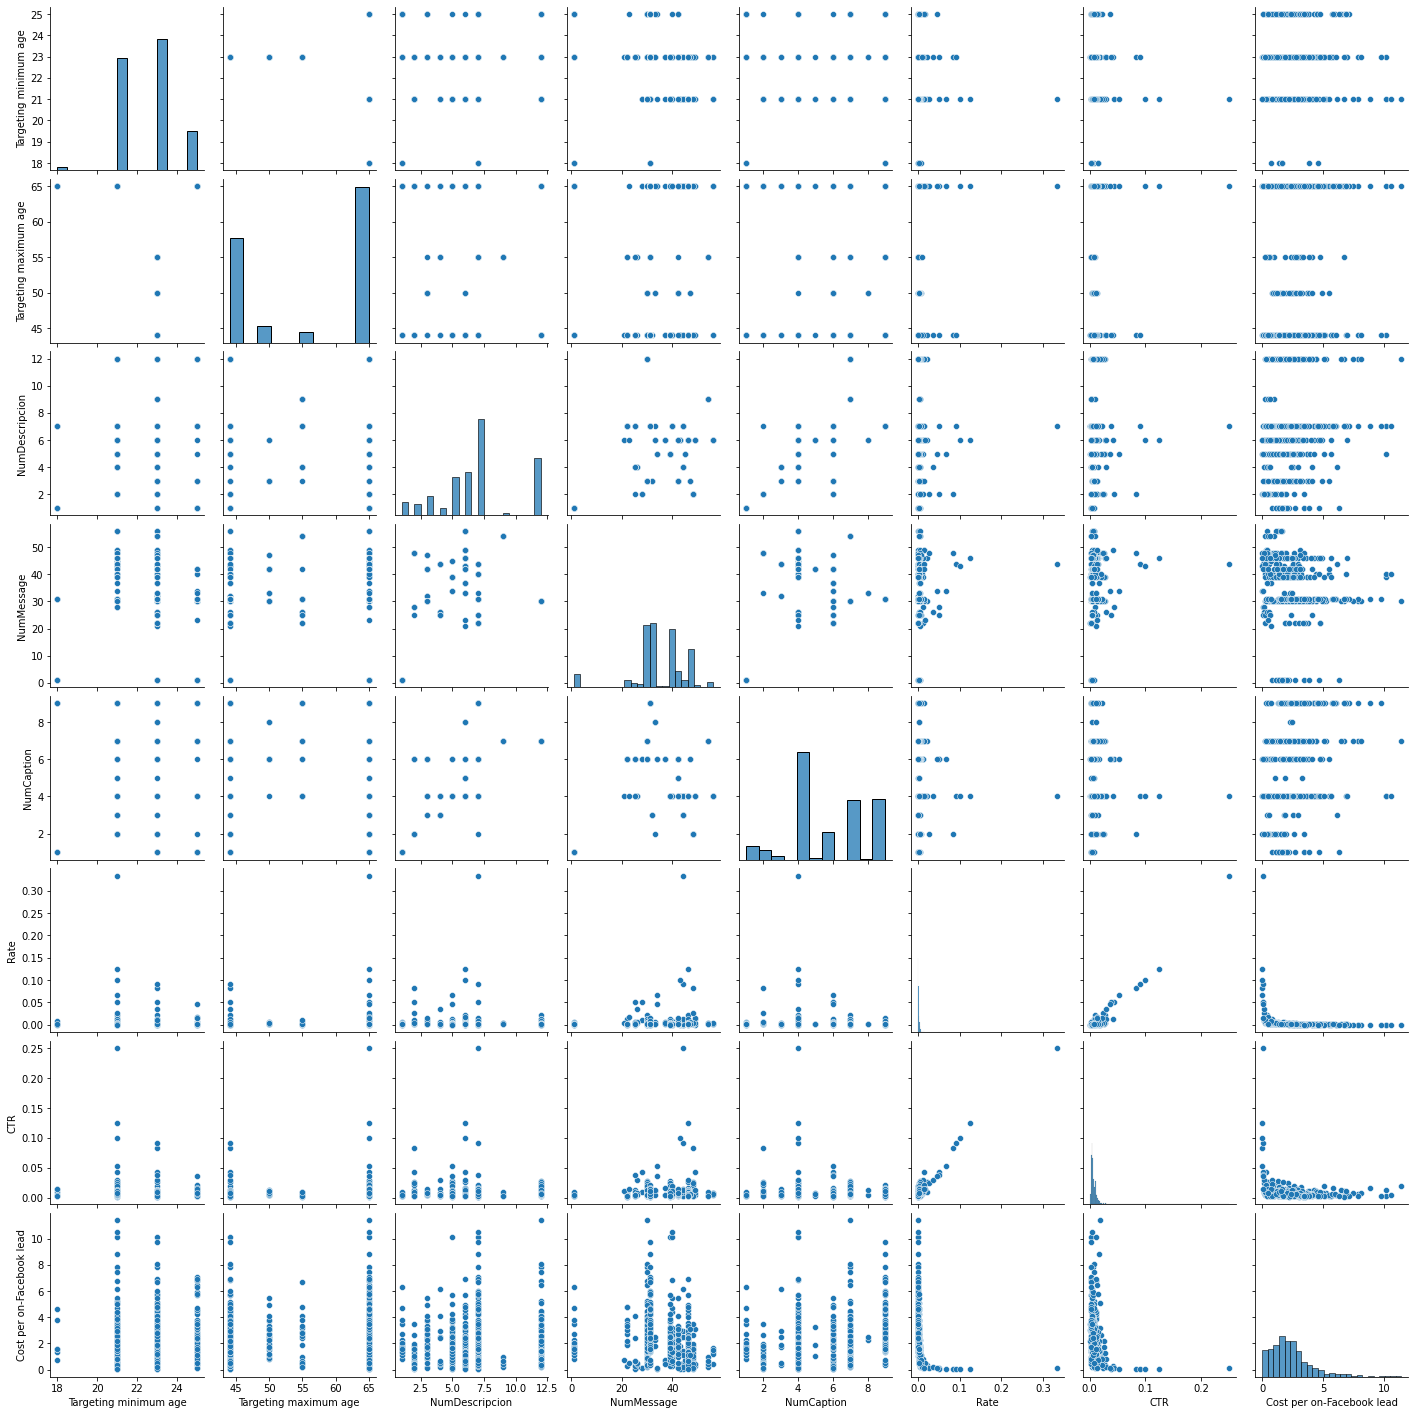

In [ ]:
sns.pairplot(data[[*numerical_columns,'Cost per on-Facebook lead']])

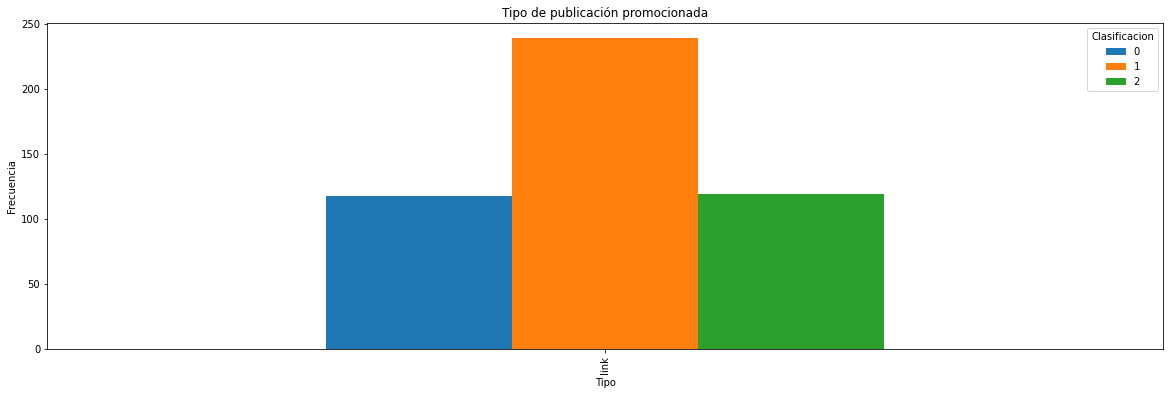

In [ ]:
pd.crosstab(data["Promoted post type"],data["Clasificacion"]).plot(kind="bar",figsize=(20,6))
plt.title('Tipo de publicación promocionada')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

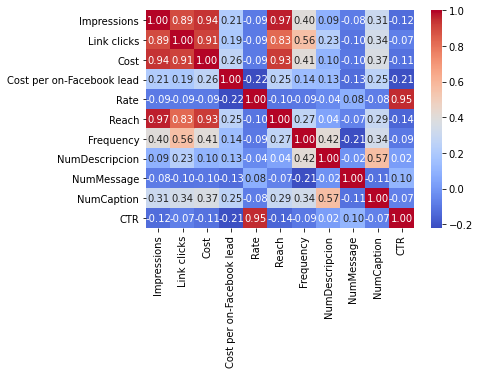

In [ ]:
numerical_columns = ["Impressions","Link clicks","Cost","Cost per on-Facebook lead","Rate","Reach","Frequency","NumDescripcion","NumMessage","NumCaption","CTR"]
g=sns.heatmap(data[numerical_columns].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

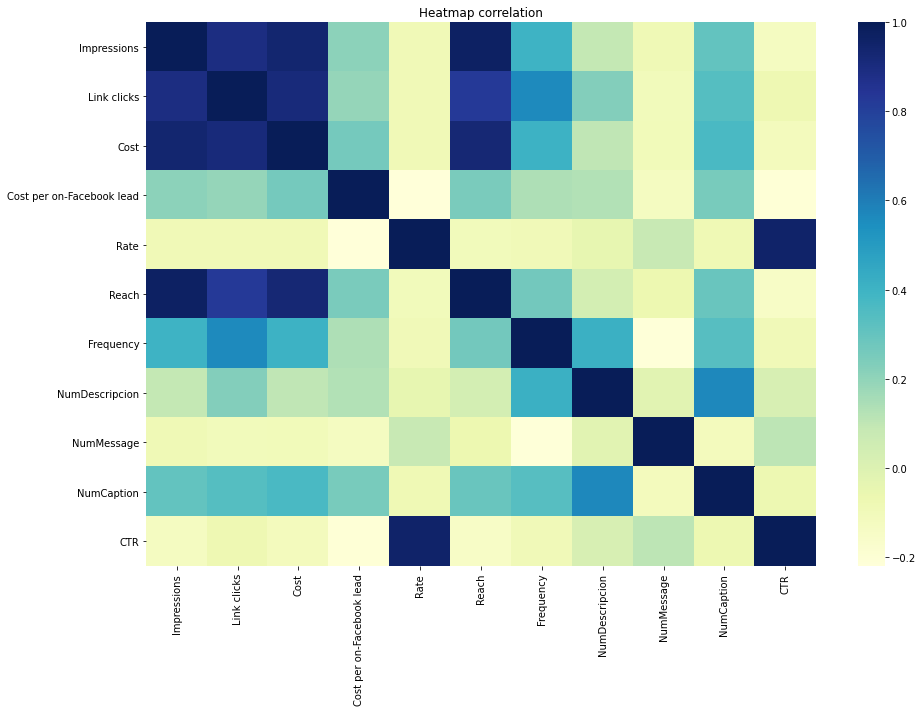

In [ ]:
import seaborn

df_corr = data[numerical_columns].corr() # Calculation of the correlation coefficients in pairs, with the default method:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") 
seaborn.set(font_scale=1,style='white')

plt.title('Heatmap correlation')
plt.show()

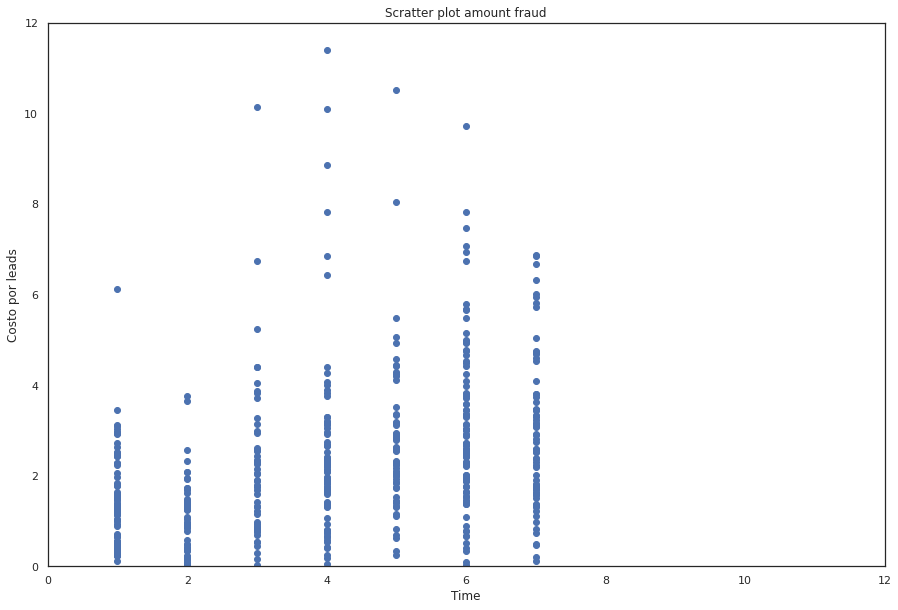

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(data['Month'], data['Cost per on-Facebook lead']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Costo por leads')
plt.xlim([0,12])
plt.ylim([0,12])
plt.show()

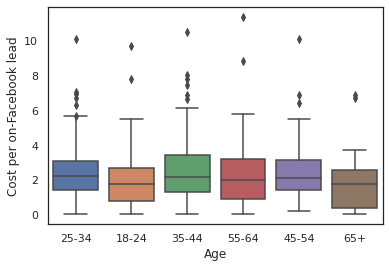

In [ ]:
dibujar_box_plot(data, 'Cost per on-Facebook lead', 'Age', 'v')

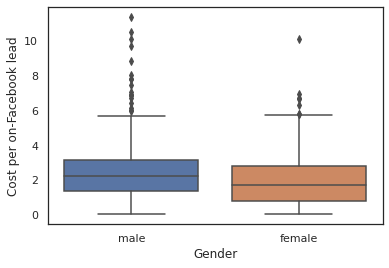

In [ ]:
dibujar_box_plot(data, 'Cost per on-Facebook lead', 'Gender', 'v')

# 2.- Seleccion de variables, data entrenamiento y test


In [ ]:
data.columns

Index(['Year', 'Year & month', 'Month', 'Campaign ID', 'Campaign name',
       'Campaign objective', 'Ad set ID', 'Ad set name', 'Ad ID', 'Ad name',
       'Promoted post type', 'Promoted post created date',
       'Promoted post description', 'Promoted post message',
       'Promoted post caption', 'Ad set start time', 'Ad set end time',
       'Ad set targeting', 'Targeting minimum age', 'Targeting maximum age',
       'Age', 'Gender', 'Cost', 'Impressions', 'Reach', 'Frequency',
       'Link clicks', 'Unique leads', 'CPM (cost per 1000 impressions)',
       'Cost per on-Facebook lead', 'Clasificacion', 'ClasificacionDes',
       'Descripcion', 'Message', 'Caption', 'NumDescripcion', 'NumMessage',
       'NumCaption', 'Rate', 'CTR', 'intereses', 'ComprasOnline', 'Seguridad',
       'SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS',
       'SmartTechnologies', 'TarjetasCredito', 'Transporte', 'Vehiculos'],
      dtype='object')

# Preprocesamiento y split de train - test

In [ ]:
data['intereses'].unique()

array(['| Anti-theft system | Compras online | Conducción | Dispositivo inteligente | Dispositivos GPS | GPS Asistido | Google Maps | Security | Security alarm | Seguridad | Sistema de alarma | Smart Technologies | Tarjetas de crédito | Transporte | Vehicle tracking system | ',
       '| Business class | Compras online | Pequeñas empresas | Pequeñas y medianas empresas | Sector automotor | Tarjetas de crédito | Vehículos | Vehículos de lujo | Vehículos todoterreno | ',
       '| Anti-theft system | Carreras de motocicletas | Club de moteros | Dispositivos GPS | Google Maps | Harley-Davidson | Honda | Kawasaki motorcycles | Motero | Motocicleta crucero | Motocicleta custom | Motocicleta deportiva | Motocicletas | Motociclismo | Motorcycle accessories | Security alarm | Sistema de alarma | Suzuki | Unidad de seguimiento GPS | Vehicle tracking system | Waze | Yamaha Motor Company | ',
       '0',
       '| Anti-theft system | Dispositivos GPS | Rastreo Vehicular Automatizado | Unidad de s

In [ ]:
data.sample(2)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,ClasificacionDes,Descripcion,Message,Caption,NumDescripcion,NumMessage,NumCaption,Rate,CTR,intereses,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos
238,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823950753,intereses_drive - amplio - 3 ciudades,23846149196000753,anuncio_promo_black_friday_2,link,44272,Dispositivo GPS e instalación GRATIS,Con CarSync dejar las llaves dentro del auto y...,Precio por tiempo limitado,44118,NaN,"{""age_max"":65,""age_min"":21,""excluded_custom_au...",21,65,18-24,male,0.56,308,265,1.16,2,1,1.83,0.56,2,Mejores,Dispositivo GPS e instalación GRATIS,Con CarSync dejar las llaves dentro del auto y...,Precio por tiempo limitado,5,45,4,0.003774,0.006494,| Business class | Compras online | Pequeñas e...,1,0,0,0,0,0,1,0,1
950,2021,2021|03,3,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23846722687440753,anuncio_nuevo_taxista_particular_1,link,44327,Incrementa la satisfacción de tus clientes con...,¿Eres taxista particular? Con CarSync optimiza...,¿Transportas pasajeros? CarSync es tu aliado p...,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,65.48,33937,12912,2.63,204,22,1.93,2.98,1,Regulares,Incrementa la satisfacción de tus clientes con...,¿Eres taxista particular? Con CarSync optimiza...,¿Transportas pasajeros? CarSync es tu aliado p...,12,30,7,0.001704,0.006011,| Anti-theft system | Compras online | Conducc...,1,1,1,1,1,1,1,1,1


In [ ]:
data_original = data.copy()


In [ ]:

df= data.drop(['Year', 'Year & month', 'Campaign ID', 'Campaign name',
       'Campaign objective', 'Ad set ID', 'Ad set name', 'Ad ID', 'Ad name',
       'Promoted post type','Promoted post description', 'Promoted post message',
       'Promoted post caption', 'Ad set start time', 'Ad set end time',
       'Ad set targeting', 'Frequency', 'ClasificacionDes',
       'Descripcion', 'Message', 'Caption','Promoted post created date','intereses'], axis=1)


In [ ]:
df.columns

Index(['Month', 'Targeting minimum age', 'Targeting maximum age', 'Age',
       'Gender', 'Cost', 'Impressions', 'Reach', 'Link clicks', 'Unique leads',
       'CPM (cost per 1000 impressions)', 'Cost per on-Facebook lead',
       'Clasificacion', 'NumDescripcion', 'NumMessage', 'NumCaption', 'Rate',
       'CTR', 'ComprasOnline', 'Seguridad', 'SeguridadAlarmas',
       'DispositivoInteligente', 'DispositivosGPS', 'SmartTechnologies',
       'TarjetasCredito', 'Transporte', 'Vehiculos'],
      dtype='object')

In [ ]:
#df= data[["Month", "NumDescripcion","NumMessage","NumCaption","Targeting minimum age","Targeting maximum age","Age","Gender","Cost","Impressions","Reach","Link clicks","Unique leads","Cost per on-Facebook lead","Rate","CTR","Clasificacion"]]

Creating Dummy Variables¶


no es necesario aplicar esto cuando se tiene el pipeline, ver esta referencia para variables categoricas enteras, por tanto no era necesario cambiarlas a entero

https://www.it-swarm-es.com/es/python/preprocesamiento-de-funciones-de-variables-continuas-y-categoricas-de-tipo-entero-con-scikit-learn/830818857/

In [ ]:

a = pd.get_dummies(data['Gender'], prefix = "type")
b = pd.get_dummies(data['Age'], prefix = "type")

frames = [df,a,b]
df = pd.concat(frames, axis = 1)
df.head()
df = df.drop(columns = ['Gender','Age'])
df.head()

,Month,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+
3,1,23,44,0.32,226,193,3,1,1.42,0.32,2,2,25,6,0.005181,0.013274,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0
13,1,23,44,4.60,4608,2525,14,3,1.00,1.53,1,2,48,2,0.001188,0.003038,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0
15,1,23,44,3.67,1749,1172,4,2,2.10,1.84,1,2,48,2,0.001706,0.002287,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0
16,1,23,44,21.01,15951,9362,73,8,1.32,2.63,1,2,48,2,0.000855,0.004577,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0
18,1,23,44,1.94,795,516,10,3,2.44,0.65,2,2,48,2,0.005814,0.012579,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 3 to 3023
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            476 non-null    int64  
 1   Targeting minimum age            476 non-null    int64  
 2   Targeting maximum age            476 non-null    int64  
 3   Cost                             476 non-null    float64
 4   Impressions                      476 non-null    int64  
 5   Reach                            476 non-null    int64  
 6   Link clicks                      476 non-null    int64  
 7   Unique leads                     476 non-null    int64  
 8   CPM (cost per 1000 impressions)  476 non-null    float64
 9   Cost per on-Facebook lead        476 non-null    float64
 10  Clasificacion                    476 non-null    int64  
 11  NumDescripcion                   476 non-null    int64  
 12  NumMessage           

In [ ]:
df.head(3)

,Month,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+
3,1,23,44,0.32,226,193,3,1,1.42,0.32,2,2,25,6,0.005181,0.013274,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0
13,1,23,44,4.60,4608,2525,14,3,1.00,1.53,1,2,48,2,0.001188,0.003038,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0
15,1,23,44,3.67,1749,1172,4,2,2.10,1.84,1,2,48,2,0.001706,0.002287,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0


Definicion de las variables 

In [ ]:
y = df.Clasificacion.values
x_data = df.drop(['Clasificacion'], axis = 1)

In [ ]:
df.index

Int64Index([   3,   13,   15,   16,   18,   19,   22,   24,   25,   28,
            ...
            2931, 2937, 2958, 2959, 2961, 2962, 2965, 2968, 3019, 3023],
           dtype='int64', length=476)

In [ ]:
x_temp.index

Int64Index([   3,   13,   15,   16,   18,   19,   22,   24,   25,   28,
            ...
            2931, 2937, 2958, 2959, 2961, 2962, 2965, 2968, 3019, 3023],
           dtype='int64', length=476)

In [ ]:
df.to_csv('df_csv.csv',header=True)

Normalizacion de la data 

In [ ]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x


,Month,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+
3,0.0,0.714286,0.0,0.001396,0.001501,0.002819,0.003883,0.000000,0.025047,0.026385,0.090909,0.436364,0.625,0.014858,0.048770,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13,0.0,0.714286,0.0,0.021306,0.031121,0.037421,0.025243,0.029851,0.009346,0.132806,0.090909,0.854545,0.125,0.002869,0.007639,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.714286,0.0,0.016980,0.011795,0.017346,0.005825,0.014925,0.050467,0.160070,0.090909,0.854545,0.125,0.004426,0.004620,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16,0.0,0.714286,0.0,0.097646,0.107794,0.138868,0.139806,0.104478,0.021308,0.229551,0.090909,0.854545,0.125,0.001868,0.013820,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
18,0.0,0.714286,0.0,0.008932,0.005347,0.007612,0.017476,0.029851,0.063178,0.055409,0.090909,0.854545,0.125,0.016757,0.045975,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,1.0,1.000000,1.0,0.048055,0.046843,0.082736,0.046602,0.029851,0.027664,0.301671,0.545455,0.545455,1.000,0.000917,0.009918,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2965,1.0,1.000000,1.0,0.022051,0.018933,0.035285,0.031068,0.014925,0.035514,0.207564,0.545455,0.545455,1.000,0.001824,0.019784,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2968,1.0,1.000000,1.0,0.014561,0.009903,0.017301,0.029126,0.014925,0.052336,0.137203,0.545455,0.545455,1.000,0.004439,0.039196,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3019,1.0,1.000000,1.0,0.000419,0.000466,0.000905,0.000000,0.000000,0.028411,0.007916,0.181818,0.745455,0.375,0.046210,0.050475,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

Data entrenamiento y de test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0 , stratify=y)


In [ ]:
#x_train.info()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 2931 to 220
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            380 non-null    float64
 1   Targeting minimum age            380 non-null    float64
 2   Targeting maximum age            380 non-null    float64
 3   Cost                             380 non-null    float64
 4   Impressions                      380 non-null    float64
 5   Reach                            380 non-null    float64
 6   Link clicks                      380 non-null    float64
 7   Unique leads                     380 non-null    float64
 8   CPM (cost per 1000 impressions)  380 non-null    float64
 9   Cost per on-Facebook lead        380 non-null    float64
 10  NumDescripcion                   380 non-null    float64
 11  NumMessage                       380 non-null    float64
 12  NumCaption         

# 3.- Creacion de modelos


## 3.0.- Pycaret

https://www.kaggle.com/sureshmecad/pycaret-automl-beginers

https://www.kaggle.com/frtgnn/pycaret-introduction-classification-regression

In [ ]:
np.random.seed(9)
train, test = train_test_split(df,test_size = 0.2,random_state=0)
#Eliminar Impresiones , Reach y link dado que estan ya el CTR y Rate, y dejar solo rate dado que con CTR hay una correlacion
train= train.drop(['Unique leads','Impressions', 'Reach', 'Link clicks','Cost','CTR','Cost per on-Facebook lead'],axis=1 )
test= test.drop(['Unique leads','Impressions', 'Reach', 'Link clicks','Cost','CTR','Cost per on-Facebook lead'],axis=1 )
print(train.columns)
print(test.columns)

Index(['Month', 'Targeting minimum age', 'Targeting maximum age',
       'CPM (cost per 1000 impressions)', 'Clasificacion', 'NumDescripcion',
       'NumMessage', 'NumCaption', 'Rate', 'ComprasOnline', 'Seguridad',
       'SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS',
       'SmartTechnologies', 'TarjetasCredito', 'Transporte', 'Vehiculos',
       'type_female', 'type_male', 'type_18-24', 'type_25-34', 'type_35-44',
       'type_45-54', 'type_55-64', 'type_65+'],
      dtype='object')
Index(['Month', 'Targeting minimum age', 'Targeting maximum age',
       'CPM (cost per 1000 impressions)', 'Clasificacion', 'NumDescripcion',
       'NumMessage', 'NumCaption', 'Rate', 'ComprasOnline', 'Seguridad',
       'SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS',
       'SmartTechnologies', 'TarjetasCredito', 'Transporte', 'Vehiculos',
       'type_female', 'type_male', 'type_18-24', 'type_25-34', 'type_35-44',
       'type_45-54', 'type_55-64', 'type_65+'],
    

In [ ]:
from pycaret.classification import *

In [ ]:
train.columns

Index(['Month', 'Targeting minimum age', 'Targeting maximum age',
       'CPM (cost per 1000 impressions)', 'Clasificacion', 'NumDescripcion',
       'NumMessage', 'NumCaption', 'Rate', 'ComprasOnline', 'Seguridad',
       'SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS',
       'SmartTechnologies', 'TarjetasCredito', 'Transporte', 'Vehiculos',
       'type_female', 'type_male', 'type_18-24', 'type_25-34', 'type_35-44',
       'type_45-54', 'type_55-64', 'type_65+'],
      dtype='object')

In [ ]:
clf1 = setup(data =train, 
             target = 'Clasificacion')
            # numeric_imputation = 'mean'),
            #categorical_features = ['Gender','Age'])
            #ignore_features = ['Cost per on-Facebook lead','Unique leads'])
            # silent = True)       


,Description,Value
0,session_id,8572
1,Target,Clasificacion
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(380, 26)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# Comparar modelos
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8108,0.9064,0.8052,0.8268,0.8091,0.6912,0.7000,0.299
lightgbm,Light Gradient Boosting Machine,0.7850,0.9141,0.7750,0.7962,0.7803,0.6459,0.6534,0.108
dt,Decision Tree Classifier,0.7513,0.7897,0.7454,0.7605,0.7509,0.5945,0.5978,0.019
rf,Random Forest Classifier,0.7396,0.8307,0.6799,0.7741,0.7263,0.5446,0.5716,0.475
ada,Ada Boost Classifier,0.6866,0.8203,0.6120,0.7379,0.6634,0.4413,0.4810,0.104
et,Extra Trees Classifier,0.5781,0.7193,0.5204,0.5866,0.5659,0.2738,0.2819,0.464
lda,Linear Discriminant Analysis,0.5553,0.6773,0.4869,0.5661,0.5333,0.2298,0.2414,0.019
lr,Logistic Regression,0.5283,0.6200,0.4530,0.5030,0.4972,0.1802,0.1933,0.489
ridge,Ridge Classifier,0.5021,0.0000,0.4306,0.4772,0.4705,0.1407,0.1537,0.015
knn,K Neighbors Classifier,0.4796,0.6086,0.4111,0.4595,0.4513,0.1034,0.1063,0.117


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8572, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

https://www.kaggle.com/niklasdonges/end-to-end-project-with-python
https://github.com/see-ecuador/MLProductivo/blob/main/diabetes.ipynb

## 3.0.1- Pycaret: Mejor modelo 1: gbc

In [ ]:
# Mejor modelo 
gbc_model  = create_model('gbc')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9684,0.8730,0.8938,0.8894,0.8163,0.8183
1,0.9259,0.9538,0.9286,0.9312,0.9259,0.8797,0.8817
2,0.8519,0.8966,0.8730,0.8735,0.8567,0.7672,0.7742
3,0.8148,0.8792,0.7937,0.8315,0.8143,0.6925,0.6975
4,0.7037,0.7884,0.6190,0.7630,0.6854,0.4653,0.5094
5,0.8462,0.9583,0.8095,0.8606,0.8436,0.7347,0.7433
6,0.7692,0.9413,0.8022,0.7894,0.7740,0.6406,0.6466
7,0.7308,0.8074,0.7466,0.7356,0.7318,0.5748,0.5762
8,0.8462,0.9559,0.8376,0.8433,0.8422,0.7530,0.7548
9,0.7308,0.9144,0.7686,0.7462,0.7280,0.5882,0.5980


In [ ]:
# Ajuste
tuned_gbc = tune_model(gbc_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9673,0.8968,0.8966,0.8911,0.8224,0.8243
1,0.8889,0.9372,0.9048,0.8913,0.8883,0.8224,0.8243
2,0.8889,0.9126,0.8968,0.8966,0.8911,0.8224,0.8243
3,0.7407,0.8327,0.7222,0.7645,0.7440,0.5695,0.5736
4,0.7407,0.7800,0.6508,0.8272,0.7078,0.5239,0.6003
5,0.8462,0.9718,0.8413,0.8571,0.8488,0.7451,0.7469
6,0.8077,0.9200,0.8199,0.8269,0.8117,0.6956,0.7005
7,0.6923,0.8389,0.6612,0.7324,0.6905,0.4889,0.4983
8,0.7308,0.8954,0.6709,0.6947,0.6883,0.5450,0.5656
9,0.7308,0.8658,0.7088,0.7264,0.7270,0.5614,0.5629


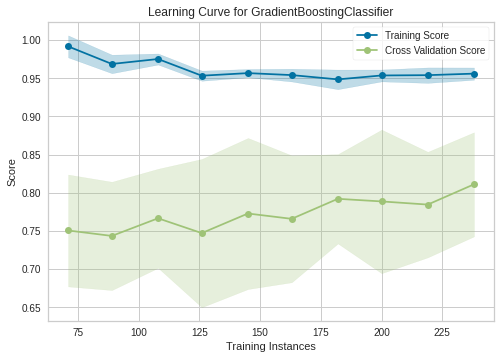

In [ ]:
#Learning Curve
plot_model(estimator = tuned_gbc, plot = 'learning')

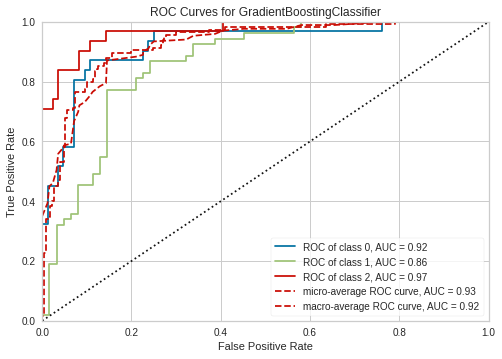

In [ ]:
# AUC Curve
plot_model(estimator = tuned_gbc, plot = 'auc')


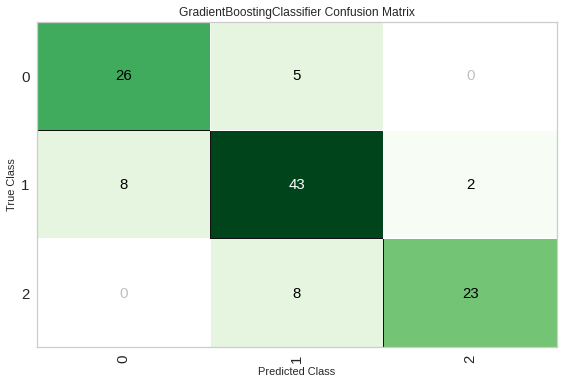

In [ ]:
#Confusion Matrix
plot_model(estimator = tuned_gbc, plot = 'confusion_matrix')

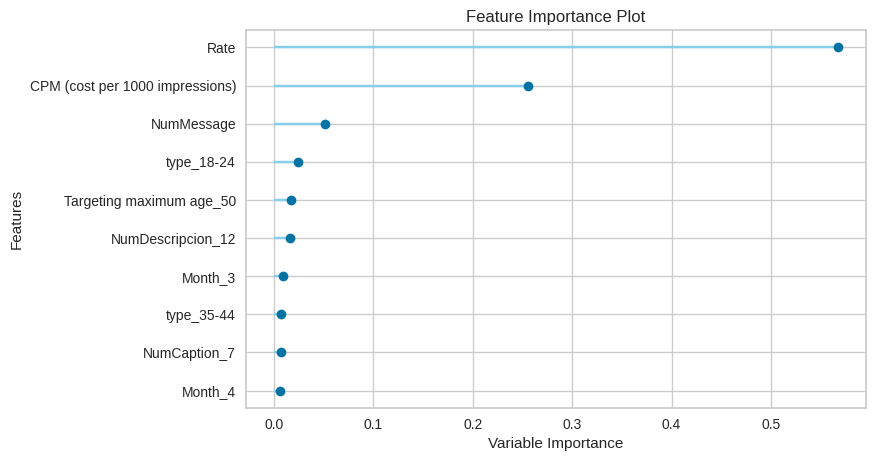

In [ ]:
#Feature Importance

plot_model(estimator = tuned_gbc, plot = 'feature')

## 3.0.1- Pycaret: Mejor modelo 2: lightgbm 

In [ ]:
# Mejor modelo 
lightgbm_model  = create_model('lightgbm')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9759,0.8730,0.8938,0.8894,0.8163,0.8183
1,0.8148,0.9413,0.8571,0.8418,0.8148,0.7140,0.7282
2,0.8519,0.9098,0.8730,0.8735,0.8567,0.7672,0.7742
3,0.7778,0.8735,0.7381,0.8056,0.7704,0.6241,0.6355
4,0.5556,0.7657,0.4921,0.5547,0.5426,0.2249,0.2328
5,0.8077,0.9436,0.7857,0.8346,0.7973,0.6750,0.6875
6,0.8846,0.9552,0.9011,0.8910,0.8862,0.8178,0.8197
7,0.7308,0.9031,0.7167,0.7341,0.7305,0.5614,0.5629
8,0.7692,0.9460,0.7265,0.7561,0.7467,0.6167,0.6285
9,0.7692,0.9273,0.7863,0.7765,0.7683,0.6414,0.6460


https://github.com/pycaret/pycaret/issues/516

In [ ]:
# Ajuste
tuned_lightgbm = tune_model(lightgbm_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8519,0.9666,0.8413,0.8519,0.8519,0.7589,0.7589
1,0.7778,0.9418,0.8016,0.7932,0.7798,0.6509,0.6567
2,0.8889,0.9080,0.8968,0.8966,0.8911,0.8224,0.8243
3,0.8148,0.8951,0.7937,0.8315,0.8143,0.6925,0.6975
4,0.6667,0.7920,0.5873,0.6830,0.6487,0.4073,0.4317
5,0.7692,0.9571,0.6984,0.8043,0.7592,0.5851,0.6108
6,0.8077,0.9422,0.8498,0.8423,0.8121,0.7045,0.7194
7,0.8077,0.8960,0.7900,0.8255,0.8074,0.6860,0.6912
8,0.8077,0.9462,0.7821,0.8015,0.7972,0.6860,0.6912
9,0.7692,0.8881,0.7863,0.7723,0.7644,0.6406,0.6466


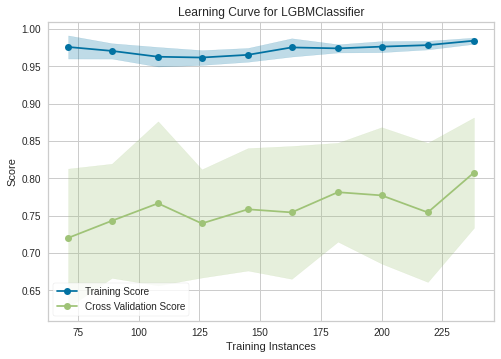

In [ ]:
#Learning Curve
plot_model(estimator = tuned_lightgbm, plot = 'learning')


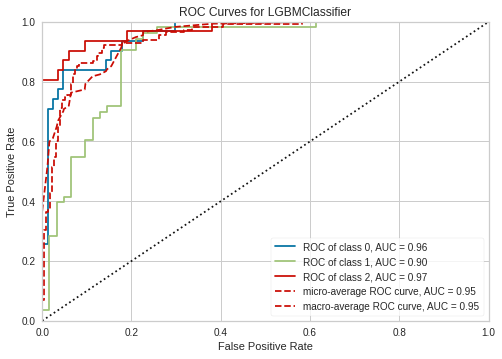

In [ ]:
# AUC Curve
plot_model(estimator = tuned_lightgbm, plot = 'auc')



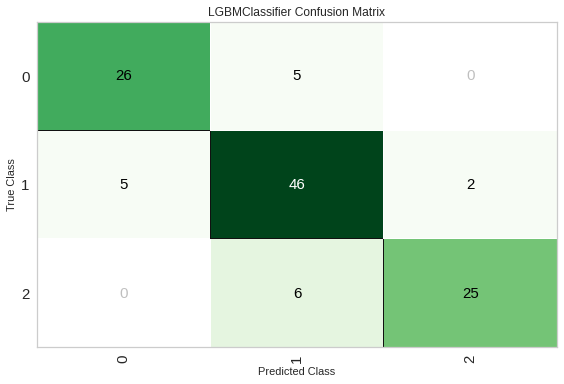

In [ ]:
#Confusion Matrix
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')


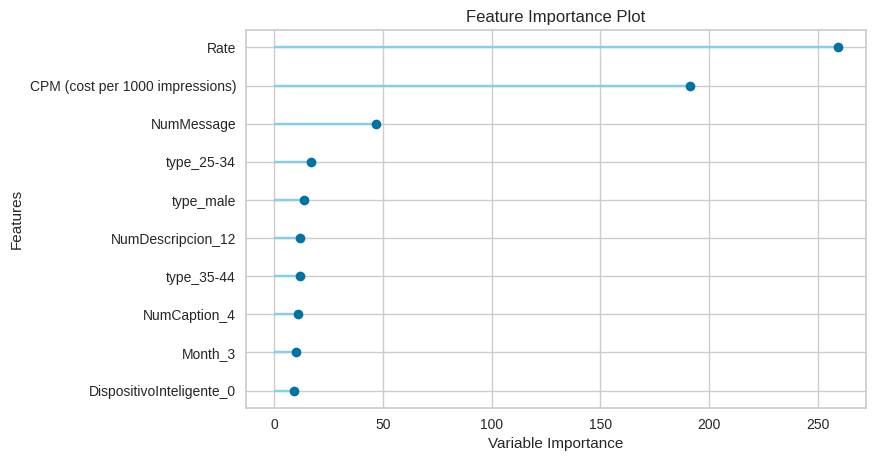

In [ ]:
#Feature Importance

plot_model(estimator = tuned_lightgbm, plot = 'feature')


In [ ]:
#Evaluar
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

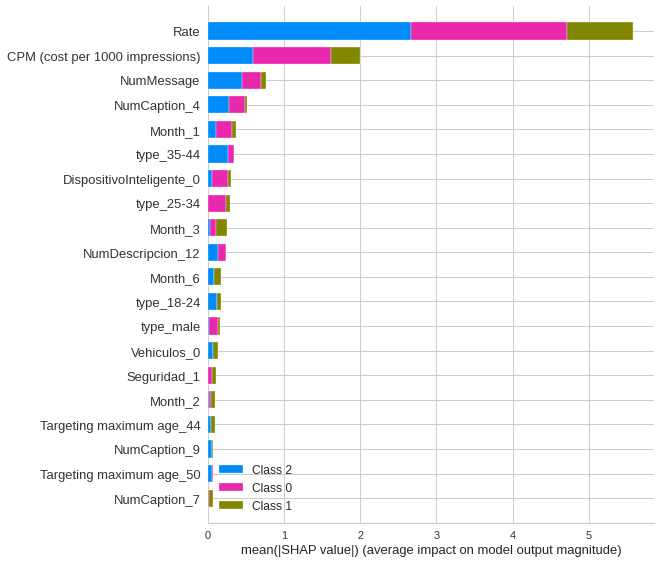

In [ ]:
#Interpretation
import shap

interpret_model(tuned_lightgbm)
#This function only supports tree based models for binary classification: dt, lightgbm, et, rf.

In [ ]:
#Predecir
predict_model(tuned_lightgbm, data=test)


,Month,Targeting minimum age,Targeting maximum age,CPM (cost per 1000 impressions),Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+,Label,Score
1518,4,21,65,2.35,2,12,30,7,0.004464,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,2,0.8661
1192,3,21,65,2.73,1,12,30,7,0.003020,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0.9085
1852,5,21,65,2.60,1,12,30,7,0.001838,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0.8627
2102,6,21,65,2.60,0,12,30,7,0.001016,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.6066
632,2,21,65,1.22,2,5,39,4,0.001414,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.9937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,4,23,44,2.47,1,12,30,7,0.001864,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0.8677
2569,7,23,44,0.93,0,7,22,6,0.000381,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0.5274
2826,7,23,55,1.26,0,7,22,6,0.000749,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.6208
2390,6,25,65,7.22,2,6,23,4,0.017857,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,2,0.8816


In [ ]:
predictions = predict_model(tuned_lightgbm, data=test)
predictions.head()

,Month,Targeting minimum age,Targeting maximum age,CPM (cost per 1000 impressions),Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+,Label,Score
1518,4,21,65,2.35,2,12,30,7,0.004464,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,2,0.8661
1192,3,21,65,2.73,1,12,30,7,0.003020,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0.9085
1852,5,21,65,2.60,1,12,30,7,0.001838,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0.8627
2102,6,21,65,2.60,0,12,30,7,0.001016,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.6066
632,2,21,65,1.22,2,5,39,4,0.001414,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.9937


In [ ]:
## 3.0.1- Pycaret: Mejor modelo 2: lightgbm 

## 3.0.1- Pycaret: Mejor modelo 3: Decision Tree 

In [ ]:
# Mejor modelo 
dt_model  = create_model('dt')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.8505,0.8254,0.8197,0.8157,0.7039,0.7056
1,0.7778,0.8120,0.7778,0.7822,0.7778,0.6392,0.6406
2,0.8519,0.8901,0.8730,0.8735,0.8567,0.7672,0.7742
3,0.7037,0.7485,0.6905,0.6981,0.6990,0.5168,0.5179
4,0.5185,0.5843,0.4921,0.5136,0.5150,0.2023,0.2028
5,0.7692,0.7833,0.7302,0.7885,0.7692,0.6020,0.6091
6,0.8077,0.8441,0.8278,0.8157,0.8103,0.6963,0.6979
7,0.6923,0.7287,0.6612,0.7324,0.6905,0.4889,0.4983
8,0.8462,0.8718,0.8376,0.8433,0.8422,0.7530,0.7548
9,0.7308,0.7833,0.7387,0.7376,0.7328,0.5758,0.5772


In [ ]:
# Ajuste
tuned_dt = tune_model(dt_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5185,0.7220,0.4286,0.5322,0.5028,0.1460,0.1546
1,0.7407,0.8409,0.7222,0.7665,0.7462,0.5724,0.5764
2,0.5556,0.7096,0.5556,0.5412,0.5431,0.2987,0.3014
3,0.5556,0.7318,0.5476,0.5782,0.5593,0.2735,0.2760
4,0.4815,0.6565,0.4524,0.5000,0.4840,0.1250,0.1263
5,0.6154,0.7548,0.5079,0.6923,0.5719,0.2778,0.3131
6,0.3462,0.5178,0.2747,0.2618,0.2976,-0.1451,-0.1606
7,0.5385,0.6874,0.4548,0.6285,0.5027,0.1811,0.2015
8,0.4615,0.5931,0.4634,0.4643,0.4615,0.1395,0.1398
9,0.5769,0.6466,0.5324,0.5761,0.5683,0.2886,0.2944


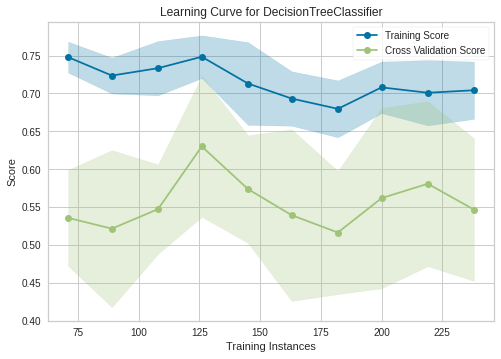

In [ ]:
#Learning Curve
plot_model(estimator = tuned_dt, plot = 'learning')


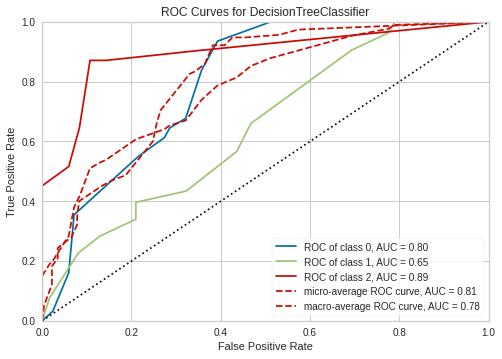

In [ ]:
# AUC Curve
plot_model(estimator = tuned_dt, plot = 'auc')


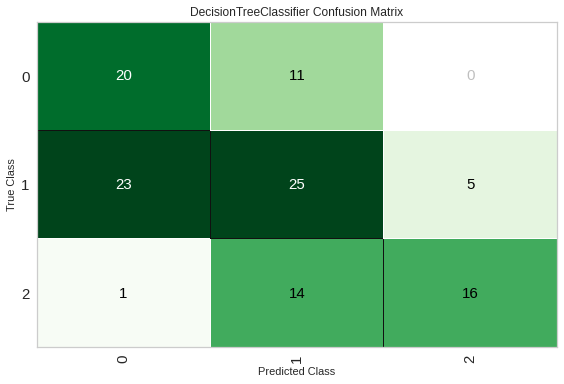

In [ ]:
#Confusion Matrix
plot_model(estimator = tuned_dt, plot = 'confusion_matrix')


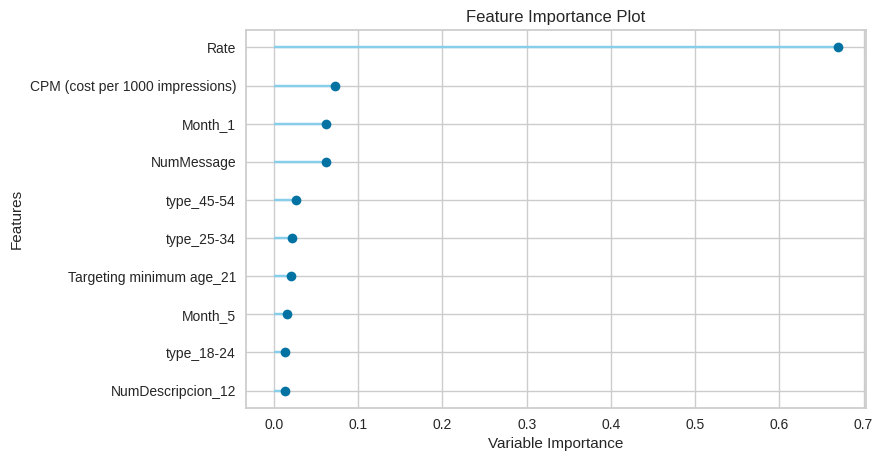

In [ ]:
#Feature Importance

plot_model(estimator = tuned_dt, plot = 'feature')

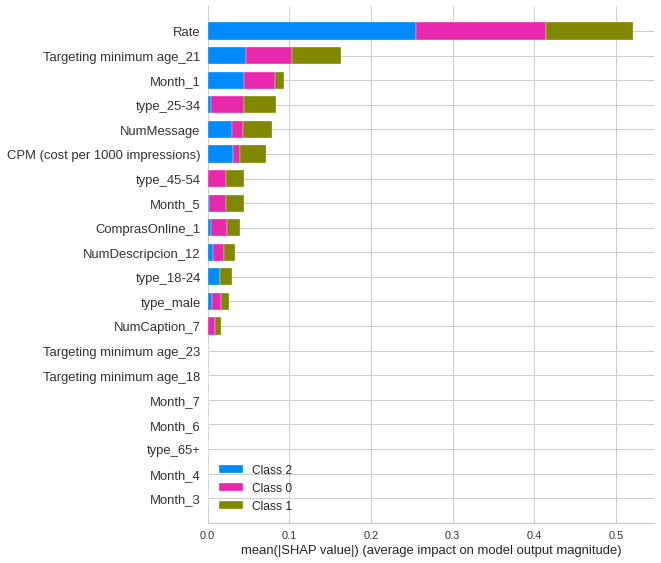

In [ ]:
#Interpretation
import shap

interpret_model(tuned_dt)
#This function only supports tree based models for binary classification: dt, lightgbm, et, rf.

In [ ]:
#Predecir
predict_model(tuned_dt, data=test)


,Month,Targeting minimum age,Targeting maximum age,CPM (cost per 1000 impressions),Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+,Label,Score
1518,4,21,65,2.35,2,12,30,7,0.004464,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,2,0.7000
1192,3,21,65,2.73,1,12,30,7,0.003020,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0.5000
1852,5,21,65,2.60,1,12,30,7,0.001838,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0.5000
2102,6,21,65,2.60,0,12,30,7,0.001016,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.5000
632,2,21,65,1.22,2,5,39,4,0.001414,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,4,23,44,2.47,1,12,30,7,0.001864,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0.5600
2569,7,23,44,0.93,0,7,22,6,0.000381,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1,0.7419
2826,7,23,55,1.26,0,7,22,6,0.000749,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.7419
2390,6,25,65,7.22,2,6,23,4,0.017857,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1.0000


In [ ]:
predictions = predict_model(tuned_dt, data=test)
predictions.head()

,Month,Targeting minimum age,Targeting maximum age,CPM (cost per 1000 impressions),Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+,Label,Score
1518,4,21,65,2.35,2,12,30,7,0.004464,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,2,0.700
1192,3,21,65,2.73,1,12,30,7,0.003020,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0.500
1852,5,21,65,2.60,1,12,30,7,0.001838,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0.500
2102,6,21,65,2.60,0,12,30,7,0.001016,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.500
632,2,21,65,1.22,2,5,39,4,0.001414,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.963


## 3.1.- Librerias a usar

In [ ]:
!pip install kneed

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd 
import random
from sklearn.cluster import KMeans
#from yellowbrick.cluster import SilhouetteVisualizer
import datetime
import seaborn as sns
import math 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotting
import plotly.graph_objs as go
import plotly as py
import plotly.express as px
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objs as pgo
import sklearn.model_selection as model_selection
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as model_selection 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
from sklearn.naive_bayes import ComplementNB 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
!pip install sklearn-pandas
from sklearn_pandas import DataFrameMapper

In [ ]:
print(x_train.columns)
x_temp =  x.drop(['Unique leads','Impressions', 'Reach', 'Link clicks','Cost','CTR','Cost per on-Facebook lead'],axis=1 )
x_train_cp = x_train.drop(['Unique leads','Impressions', 'Reach', 'Link clicks','Cost','CTR','Cost per on-Facebook lead'],axis=1 )
x_test_cp = x_test.drop(['Unique leads','Impressions', 'Reach', 'Link clicks','Cost','CTR','Cost per on-Facebook lead'],axis=1 )
print(x_temp.columns)
print(x_train_cp.columns)
print(x_test_cp.columns)

y_temp = y
print(y.shape)
print(y_train.shape)
print(y_test.shape)

Index(['Month', 'Targeting minimum age', 'Targeting maximum age', 'Cost',
       'Impressions', 'Reach', 'Link clicks', 'Unique leads',
       'CPM (cost per 1000 impressions)', 'Cost per on-Facebook lead',
       'NumDescripcion', 'NumMessage', 'NumCaption', 'Rate', 'CTR',
       'ComprasOnline', 'Seguridad', 'SeguridadAlarmas',
       'DispositivoInteligente', 'DispositivosGPS', 'SmartTechnologies',
       'TarjetasCredito', 'Transporte', 'Vehiculos', 'type_female',
       'type_male', 'type_18-24', 'type_25-34', 'type_35-44', 'type_45-54',
       'type_55-64', 'type_65+'],
      dtype='object')
Index(['Month', 'Targeting minimum age', 'Targeting maximum age',
       'CPM (cost per 1000 impressions)', 'NumDescripcion', 'NumMessage',
       'NumCaption', 'Rate', 'ComprasOnline', 'Seguridad', 'SeguridadAlarmas',
       'DispositivoInteligente', 'DispositivosGPS', 'SmartTechnologies',
       'TarjetasCredito', 'Transporte', 'Vehiculos', 'type_female',
       'type_male', 'type_18-24', '

In [ ]:
lista_etiquetas = [0,1,2]

In [ ]:
x_total= x.copy()
x_total['y'] = y


In [ ]:
#bajar el archivo para usarlo en el dashboard
x_total.to_csv( 'x_total.csv',index=False, header=True)

In [ ]:
print(type(x_train_cp))
print(x_train_cp)

#X = data_original.drop('Clasificacion', axis=1)

<class 'pandas.core.frame.DataFrame'>
         Month  Targeting minimum age  ...  type_55-64  type_65+
2931  1.000000               0.000000  ...         0.0       0.0
2070  0.833333               0.428571  ...         0.0       0.0
1761  0.666667               0.428571  ...         0.0       0.0
716   0.166667               0.428571  ...         0.0       0.0
1309  0.500000               0.714286  ...         0.0       0.0
...        ...                    ...  ...         ...       ...
1041  0.333333               0.428571  ...         1.0       0.0
1814  0.666667               0.428571  ...         0.0       0.0
1911  0.833333               0.714286  ...         0.0       0.0
1612  0.500000               0.714286  ...         0.0       0.0
220   0.000000               0.428571  ...         0.0       0.0

[380 rows x 25 columns]


In [ ]:
print(type(x_test_cp))
print(x_test_cp)

<class 'pandas.core.frame.DataFrame'>
         Month  Targeting minimum age  ...  type_55-64  type_65+
2069  0.833333               0.428571  ...         0.0       0.0
42    0.000000               0.714286  ...         0.0       0.0
1512  0.500000               0.428571  ...         0.0       0.0
700   0.166667               0.428571  ...         0.0       0.0
539   0.166667               0.714286  ...         0.0       0.0
...        ...                    ...  ...         ...       ...
193   0.000000               0.428571  ...         0.0       0.0
1671  0.666667               0.714286  ...         0.0       0.0
2482  0.833333               0.714286  ...         0.0       0.0
559   0.166667               0.714286  ...         0.0       0.0
2271  0.833333               1.000000  ...         0.0       0.0

[96 rows x 25 columns]


In [ ]:
y_temp.shape

(476,)

In [ ]:
# para guardar el accuracie
accuracies = {}

In [ ]:
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=123)
cv

RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123)

## 3.1.- Logistic regression multinomial



In [ ]:
# define the multinomial logistic regression model
model_lg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_lg

LogisticRegression(multi_class='multinomial')

In [ ]:
lr = model_lg.fit(x_train_cp, y_train)

In [ ]:
# get modelo


acc = model_lg.score(x_test_cp,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 54.17%


In [ ]:
# get importance
importances = model_lg.coef_[0]

In [ ]:
# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train_cp.columns), 'importance':importances})
df_imp.sort_values('importance', ascending=False,inplace=True)
df_imp[df_imp.importance >= 0.05 ].head(20)

,feature,importance
0,Month,1.538439
6,NumCaption,0.912460
2,Targeting maximum age,0.709489
4,NumDescripcion,0.702886
9,Seguridad,0.367967
21,type_35-44,0.277916
20,type_25-34,0.262191
10,SeguridadAlarmas,0.207397
23,type_55-64,0.206191
13,SmartTechnologies,0.201333


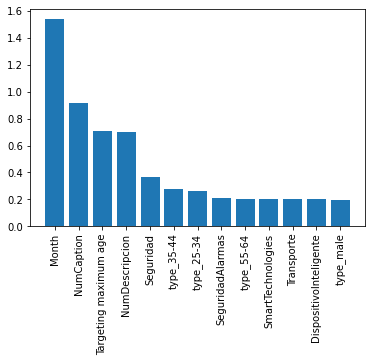

In [ ]:
plt.bar(df_imp[df_imp.importance >= 0.05 ].feature,df_imp[df_imp.importance >= 0.05 ].importance)
plt.xticks(rotation=90)
plt.show()


In [ ]:
model_lg.score(x_test_cp,y_test)

0.5416666666666666

In [ ]:
print( classification_report(y_test, model_lg.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.44      0.29      0.35        24
           1       0.54      0.73      0.62        48
           2       0.67      0.42      0.51        24

    accuracy                           0.54        96
   macro avg       0.55      0.48      0.49        96
weighted avg       0.55      0.54      0.53        96



Plot of a ROC over x_test_cp

In [ ]:
probabilidad = lr.predict_proba(x_test_cp)

In [ ]:
prediccion = lr.predict(x_temp)

In [ ]:
print(prediccion.shape)
print(x_temp.shape)
print(probabilidad.shape)
print(y_temp.shape)

(476,)
(476, 25)
(96, 3)
(476,)


In [ ]:

#probabilidad


array([[0.39045772, 0.51694256, 0.09259972],
       [0.07960363, 0.63936838, 0.28102799],
       [0.2777605 , 0.57623618, 0.14600332],
       [0.05122423, 0.40823382, 0.54054195],
       [0.11794975, 0.61016955, 0.27188069],
       [0.46536938, 0.32032358, 0.21430704],
       [0.55193282, 0.39671299, 0.05135419],
       [0.34583583, 0.56666475, 0.08749942],
       [0.04525505, 0.54301583, 0.41172913],
       [0.27636984, 0.54780876, 0.1758214 ],
       [0.15947854, 0.53083752, 0.30968394],
       [0.70441431, 0.18729591, 0.10828978],
       [0.07975412, 0.72166869, 0.19857719],
       [0.55106363, 0.2823607 , 0.16657567],
       [0.05953682, 0.50509029, 0.4353729 ],
       [0.35629271, 0.50218791, 0.14151939],
       [0.06619713, 0.27434998, 0.6594529 ],
       [0.59764106, 0.32787849, 0.07448044],
       [0.14021297, 0.54683876, 0.31294827],
       [0.08629113, 0.52723918, 0.38646969],
       [0.02055229, 0.22422764, 0.75522007],
       [0.32227018, 0.57079528, 0.10693454],
       [0.

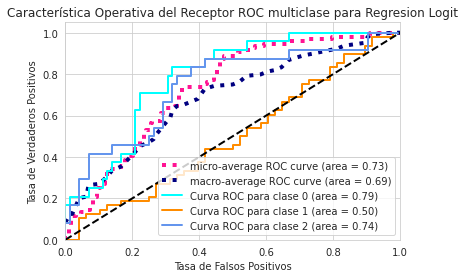

In [ ]:
grafica_roc_multiclase (y_test, probabilidad,  lista_etiquetas, 'Regresion Logit')

In [ ]:
import pickle
# Lets dump our rf_model
pickle.dump(lr, open('lr_model.pkl','wb'))

*******FIN VERSION ANTERIOR REGRESION LOGISTICA

In [ ]:
#lr.feature_importances
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


## 3.2.- Elastic Net

In [ ]:
enet_grid = dict(
C = [1e-9, 1e-5, 1e-1],
l1_ratio = [0.1, 0.5, 0.9] ) 
enet_grid

{'C': [1e-09, 1e-05, 0.1], 'l1_ratio': [0.1, 0.5, 0.9]}

In [ ]:
enet = LogisticRegression(penalty= 'elasticnet', solver= 'saga', max_iter=500)

In [ ]:
enet.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
clf = GridSearchCV(enet, param_grid= enet_grid, cv=cv, n_jobs=-1)

In [ ]:
best_model_enet = clf.fit(x_train_cp, y_train)

In [ ]:

acc = best_model_enet.best_estimator_.score(x_test_cp,y_test)*100
accuracies['enet'] = acc
print("Test Accuracy of Elastic net Algorithm: {:.2f}%".format(acc))

Test Accuracy of Elastic net Algorithm: 51.04%


In [ ]:
# get importance
importances =  best_model_enet.best_estimator_.coef_[0]

enet_best = best_model_enet.best_estimator_


In [ ]:
# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train_cp.columns), 'importance':importances})
df_imp.sort_values('importance', ascending=False,inplace=True)
df_imp[df_imp.importance >= 0.05 ].head(10)


,feature,importance
0,Month,0.669669
6,NumCaption,0.542618
4,NumDescripcion,0.260666
21,type_35-44,0.097343
18,type_male,0.064665
9,Seguridad,0.054846


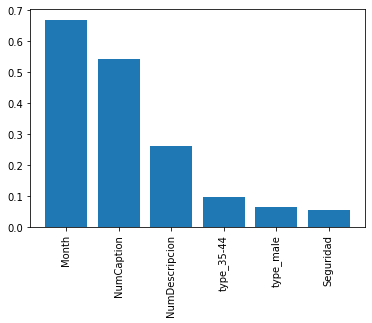

In [ ]:
# plot feature importance
plt.bar(df_imp[df_imp.importance >= 0.05 ].feature,df_imp[df_imp.importance >= 0.05 ].importance)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print( classification_report(y_test, best_model_enet.best_estimator_.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.33      0.04      0.07        24
           1       0.51      0.94      0.66        48
           2       0.75      0.12      0.21        24

    accuracy                           0.51        96
   macro avg       0.53      0.37      0.32        96
weighted avg       0.52      0.51      0.40        96



In [ ]:

probabilidad = enet_best.predict_proba(x_test_cp)



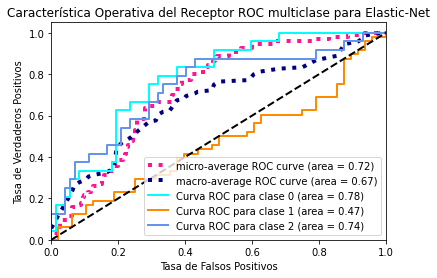

In [ ]:
grafica_roc_multiclase (y_test, probabilidad,  lista_etiquetas, 'Elastic-Net')

In [ ]:
import pickle
# Lets dump our rf_model
pickle.dump(enet_best, open('enet_model.pkl','wb'))

## 3.1.- Logistic regression multinomial con Tunning Hyperparámetros

In [ ]:
# define the multinomial logistic regression model
model_tunlg = LogisticRegression(multi_class='multinomial')
model_tunlg

#‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ 

LogisticRegression(multi_class='multinomial')

In [ ]:
# crear espacio de busqueda para 
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

solver = ['newton-cg','sag','saga','lbfgs']

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

scores = ['precision', 'recall']

In [ ]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(model_tunlg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

#clf = GridSearchCV(model_tunlg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [ ]:
# Fit randomized search
best_model_lg = clf.fit(x_train_cp, y_train)

In [ ]:
# View best hyperparameters
print('Best Penalty:', best_model_lg.best_estimator_.get_params()['penalty'])
print('Best C:', best_model_lg.best_estimator_.get_params()['C'])
print('Best solver:', best_model_lg.best_estimator_.get_params()['solver'])

Best Penalty: l2
Best C: 0.6793216782582756
Best solver: newton-cg


In [ ]:
# Predict target vector
best_model_lg.predict(x_test_cp)

array([1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
acc = best_model_lg.score(x_test_cp,y_test)*100
accuracies['best_model_lg'] = acc
print("Test Accuracy of Logistict Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistict Tunned Algorithm: 52.08%


In [ ]:
# get importance
importances = best_model_lg.best_estimator_.coef_[0]

In [ ]:
# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train_cp.columns), 'importance':importances})
df_imp.sort_values('importance', ascending=False,inplace=True)
df_imp[df_imp.importance >= 0.05 ].head(30)


,feature,importance
0,Month,1.409202
6,NumCaption,0.884971
4,NumDescripcion,0.640983
2,Targeting maximum age,0.568495
9,Seguridad,0.283021
21,type_35-44,0.254654
20,type_25-34,0.237646
23,type_55-64,0.195824
18,type_male,0.191199
11,DispositivoInteligente,0.169253


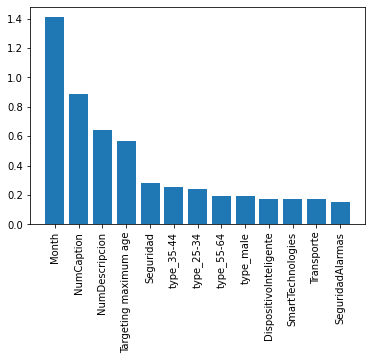

In [ ]:
# plot feature importance
plt.bar(df_imp[df_imp.importance >= 0.05 ].feature,df_imp[df_imp.importance >= 0.05 ].importance)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print( classification_report(y_test, best_model_lg.best_estimator_.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.44      0.29      0.35        24
           1       0.52      0.73      0.61        48
           2       0.62      0.33      0.43        24

    accuracy                           0.52        96
   macro avg       0.53      0.45      0.46        96
weighted avg       0.52      0.52      0.50        96



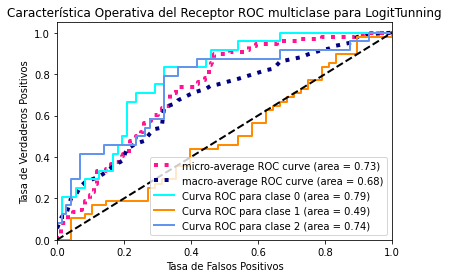

In [ ]:
blg = best_model_lg.best_estimator_

probabilidad = blg.predict_proba(x_test_cp)
grafica_roc_multiclase (y_test, probabilidad,  lista_etiquetas, 'LogitTunning')


In [ ]:
import pickle
# Lets dump our rf_model
pickle.dump(blg, open('blg.pkl','wb'))

## 3.3.- Support Vector Machine (SVM) Algorithm


https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

In [ ]:
# crear espacio de busqueda para 
# Create regularization penalty space
kernel = ['linear', 'poly', 'rbf' ,'sigmoid' 'precomputed']
# Create regularization hyperparameter distribution using uniform distribution
C = [1, 10, 100]


# Create hyperparameter options
hyperparameters = dict(C=C, kernel=kernel)

In [ ]:
svm = SVC( gamma='scale',decision_function_shape='ovr',probability=True)

In [ ]:
# Create randomized search 5-fold cross validation and 100 iterations
#clf = RandomizedSearchCV(svm, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [ ]:
clf = GridSearchCV(svm, param_grid= hyperparameters, cv=cv, n_jobs=-1)

In [ ]:
# Fit randomized search
best_model_svm = clf.fit(x_train_cp, y_train)

In [ ]:
# View best hyperparameters
print('Best kernel:', best_model_svm.best_estimator_.get_params()['kernel'])
print('Best C:', best_model_svm.best_estimator_.get_params()['C'])


Best kernel: linear
Best C: 100


In [ ]:
acc = best_model_svm.score(x_test_cp,y_test)*100
accuracies['svm'] = acc
print("Test Accuracy of Logistict Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistict Tunned Algorithm: 55.21%


In [ ]:
# get importance
importances = best_model_svm.best_estimator_.coef_[0]

# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train_cp.columns), 'importance':importances})
df_imp.sort_values('importance', ascending=False,inplace=True)
df_imp[df_imp.importance >= 0.05 ].head(30)

,feature,importance
5,NumMessage,1.331992
9,Seguridad,0.928586
6,NumCaption,0.808331
2,Targeting maximum age,0.762380
10,SeguridadAlarmas,0.694468
16,Vehiculos,0.582083
23,type_55-64,0.443598
0,Month,0.425054
4,NumDescripcion,0.378106
12,DispositivosGPS,0.253134


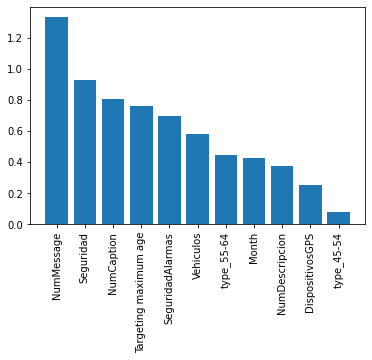

In [ ]:
# plot feature importance
plt.bar(df_imp[df_imp.importance >= 0.05 ].feature,df_imp[df_imp.importance >= 0.05 ].importance)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print( classification_report(y_test, best_model_svm.best_estimator_.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.33      0.17      0.22        24
           1       0.55      0.85      0.67        48
           2       0.89      0.33      0.48        24

    accuracy                           0.55        96
   macro avg       0.59      0.45      0.46        96
weighted avg       0.58      0.55      0.51        96



Plot of a ROC

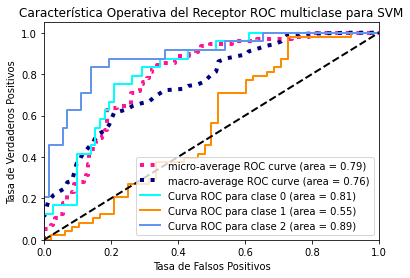

In [ ]:
svm_best = best_model_svm.best_estimator_

probabilidad = svm_best.predict_proba(x_test_cp)
grafica_roc_multiclase (y_test, probabilidad,  lista_etiquetas, 'SVM')


In [ ]:
import pickle
# Lets dump our rf_model
pickle.dump(svm_best, open('svm.pkl','wb'))

## 3.4- KNN

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  # n_neighbors means k


In [ ]:
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [ ]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(knn, hyperparameters, random_state=1, n_iter=100, cv=10, verbose=0, n_jobs=-1)

In [ ]:
# Fit randomized search
best_model_knn = clf.fit(x_train_cp, y_train)

In [ ]:
# View best hyperparameters
print('Best leaf_size:', best_model_knn.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', best_model_knn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', best_model_knn.best_estimator_.get_params()['p'])


Best leaf_size: 12
Best n_neighbors: 28
Best p: 2


In [ ]:
acc = best_model_knn.score(x_test_cp,y_test)*100
accuracies['knn'] = acc
print("Test Accuracy of Logistict Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistict Tunned Algorithm: 48.96%


In [ ]:
# No hay features importances en KNN


In [ ]:
print( classification_report(y_test, best_model_knn.best_estimator_.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.25      0.08      0.12        24
           1       0.50      0.88      0.64        48
           2       0.75      0.12      0.21        24

    accuracy                           0.49        96
   macro avg       0.50      0.36      0.33        96
weighted avg       0.50      0.49      0.40        96



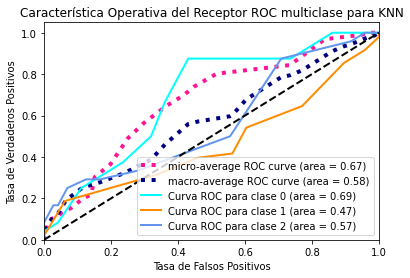

In [ ]:
knn3 = best_model_knn.best_estimator_

probabilidad = knn3.predict_proba(x_test_cp)
grafica_roc_multiclase (y_test, probabilidad,  lista_etiquetas, 'KNN')

In [ ]:
import pickle
# Lets dump our rf_model
pickle.dump(knn, open('knn3.pkl','wb'))

## 3.4- Naive Bayes

In [ ]:
hyperparameters = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()


In [ ]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(nb, hyperparameters, random_state=1, n_iter=100, cv=10, verbose=0, n_jobs=-1)

In [ ]:
# Fit randomized search
best_model_nb = clf.fit(x_train_cp, y_train)

In [ ]:
# View best hyperparameters
print('Best var_smoothing:', best_model_nb.best_estimator_.get_params()['var_smoothing'])


Best var_smoothing: 1.232846739442066e-06


In [ ]:
acc = best_model_nb.score(x_test_cp,y_test)*100
accuracies['nb'] = acc
print("Test Accuracy of Logistict Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistict Tunned Algorithm: 58.33%


In [ ]:
print( classification_report(y_test, best_model_nb.best_estimator_.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.65      0.62      0.64        24
           1       0.57      0.73      0.64        48
           2       0.50      0.25      0.33        24

    accuracy                           0.58        96
   macro avg       0.58      0.53      0.54        96
weighted avg       0.57      0.58      0.56        96



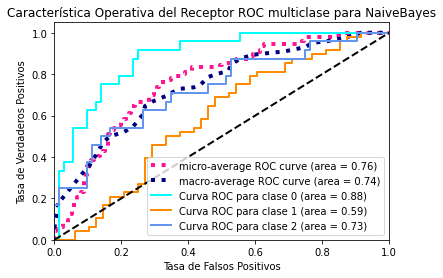

In [ ]:
nb = best_model_nb.best_estimator_

probabilidad = nb.predict_proba(x_test_cp)
grafica_roc_multiclase (y_test, probabilidad,  lista_etiquetas, 'NaiveBayes')

In [ ]:
import pickle
# Lets dump our rf_model
pickle.dump(nb, open('nb.pkl','wb'))

## 3.5.- Decision Tree Algorithm



In [ ]:

from matplotlib import pyplot
dtc = DecisionTreeClassifier(max_depth=3)


In [ ]:
# Create randomized search 5-fold cross validation and 100 iterations
#clf = RandomizedSearchCV(dtc, hyperparameters, random_state=1, n_iter=100, cv=10, verbose=0, n_jobs=-1)

In [ ]:
best_model_tree = dtc.fit(x_train_cp, y_train)



acc = best_model_tree.score(x_test_cp,y_test)*100
accuracies['tree'] = acc
print("Test Accuracy of Tree Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Tree Tunned Algorithm: 69.79%


[Text(193.15384615384616, 190.26, 'X[7] <= 0.007\ngini = 0.624\nsamples = 380\nvalue = [94, 191, 95]'),
 Text(103.01538461538462, 135.9, 'X[7] <= 0.002\ngini = 0.51\nsamples = 263\nvalue = [94, 158, 11]'),
 Text(51.50769230769231, 81.53999999999999, 'X[3] <= 0.017\ngini = 0.39\nsamples = 64\nvalue = [47, 17, 0]'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.401\nsamples = 18\nvalue = [5, 13, 0]'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.159\nsamples = 46\nvalue = [42, 4, 0]'),
 Text(154.52307692307693, 81.53999999999999, 'X[3] <= 0.076\ngini = 0.439\nsamples = 199\nvalue = [47, 141, 11]'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.312\nsamples = 155\nvalue = [17, 127, 11]'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.434\nsamples = 44\nvalue = [30, 14, 0]'),
 Text(283.2923076923077, 135.9, 'X[7] <= 0.017\ngini = 0.405\nsamples = 117\nvalue = [0, 33, 84]'),
 Text(257.53846153846155, 81.53999999999999, 'X[3] <= 0.065\ngini = 0.483\nsa

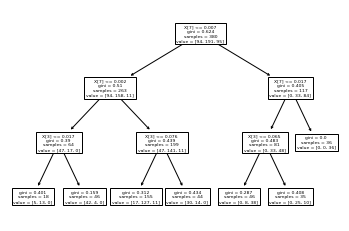

In [ ]:
from sklearn import tree

tree.plot_tree(best_model_tree.fit(x_train_cp, y_train)) 

In [ ]:
print( classification_report(y_test, best_model_tree.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.64      0.67      0.65        24
           1       0.69      0.73      0.71        48
           2       0.80      0.67      0.73        24

    accuracy                           0.70        96
   macro avg       0.71      0.69      0.70        96
weighted avg       0.70      0.70      0.70        96



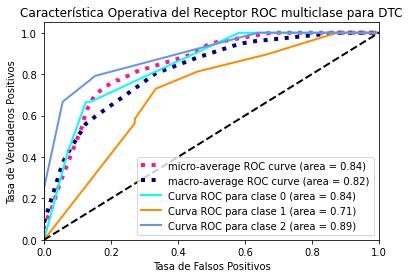

In [ ]:
dtc = best_model_tree

probabilidad = dtc.predict_proba(x_test_cp)
grafica_roc_multiclase (y_test, probabilidad,  lista_etiquetas, 'DTC')

In [ ]:
import pickle
# Lets dump our rf_model
pickle.dump(best_model_tree, open('dtc.pkl','wb'))

### Gini

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train_cp, y_train)
acc = clf_gini.score(x_test_cp, y_test)*100
accuracies['Decision Tree gini'] = acc
print("Decision Tree Gini Test Accuracy {:.2f}%".format(acc))

#Compare the train-set and test-set accuracy

y_pred_gini = clf_gini.predict(x_test_cp)
y_pred_train_gini = clf_gini.predict(x_train_cp)
y_pred_train_gini

#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train_cp, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test_cp, y_test)))


Decision Tree Gini Test Accuracy 69.79%
Training set score: 0.8184
Test set score: 0.6979


[Text(193.15384615384616, 190.26, 'X[7] <= 0.007\ngini = 0.624\nsamples = 380\nvalue = [94, 191, 95]'),
 Text(103.01538461538462, 135.9, 'X[7] <= 0.002\ngini = 0.51\nsamples = 263\nvalue = [94, 158, 11]'),
 Text(51.50769230769231, 81.53999999999999, 'X[3] <= 0.017\ngini = 0.39\nsamples = 64\nvalue = [47, 17, 0]'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.401\nsamples = 18\nvalue = [5, 13, 0]'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.159\nsamples = 46\nvalue = [42, 4, 0]'),
 Text(154.52307692307693, 81.53999999999999, 'X[3] <= 0.076\ngini = 0.439\nsamples = 199\nvalue = [47, 141, 11]'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.312\nsamples = 155\nvalue = [17, 127, 11]'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.434\nsamples = 44\nvalue = [30, 14, 0]'),
 Text(283.2923076923077, 135.9, 'X[7] <= 0.017\ngini = 0.405\nsamples = 117\nvalue = [0, 33, 84]'),
 Text(257.53846153846155, 81.53999999999999, 'X[3] <= 0.065\ngini = 0.483\nsa

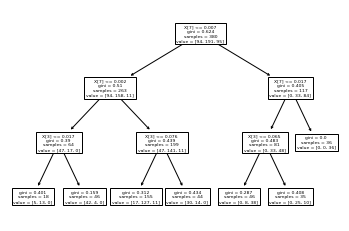

In [ ]:
# Visualize decision-trees


from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train_cp, y_train)) 

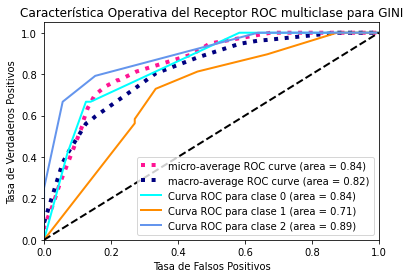

In [ ]:


probabilidad = clf_gini.predict_proba(x_test_cp)
grafica_roc_multiclase (y_test, probabilidad,  lista_etiquetas, 'GINI')

In [ ]:
import pickle
# Lets dump our rf_model
pickle.dump(clf_gini, open('gini.pkl','wb'))

### Entropy

In [ ]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train_cp, y_train)

#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(x_test_cp)

#Check accuracy score with criterion entropy
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

y_pred_train_en = clf_en.predict(x_train_cp)

y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_en.score(x_train_cp, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test_cp, y_test)))

Model accuracy score with criterion entropy: 0.7292
Training-set accuracy score: 0.7684
Training set score: 0.7684
Test set score: 0.7292


In [ ]:
accuracies['entropy'] = clf_en.score(x_test_cp, y_test) * 100


[Text(386.3076923076923, 380.52, 'X[7] <= 0.006\nentropy = 1.497\nsamples = 380\nvalue = [94, 191, 95]'),
 Text(206.03076923076924, 271.8, 'X[7] <= 0.003\nentropy = 1.131\nsamples = 254\nvalue = [94, 152, 8]'),
 Text(103.01538461538462, 163.07999999999998, 'X[3] <= 0.047\nentropy = 0.987\nsamples = 129\nvalue = [73, 56, 0]'),
 Text(51.50769230769231, 54.360000000000014, 'entropy = 0.993\nsamples = 102\nvalue = [46, 56, 0]'),
 Text(154.52307692307693, 54.360000000000014, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(309.04615384615386, 163.07999999999998, 'X[3] <= 0.076\nentropy = 0.979\nsamples = 125\nvalue = [21, 96, 8]'),
 Text(257.53846153846155, 54.360000000000014, 'entropy = 0.561\nsamples = 95\nvalue = [2, 85, 8]'),
 Text(360.55384615384617, 54.360000000000014, 'entropy = 0.948\nsamples = 30\nvalue = [19, 11, 0]'),
 Text(566.5846153846154, 271.8, 'X[7] <= 0.017\nentropy = 0.893\nsamples = 126\nvalue = [0, 39, 87]'),
 Text(515.0769230769231, 163.07999999999998, 'X[3] <

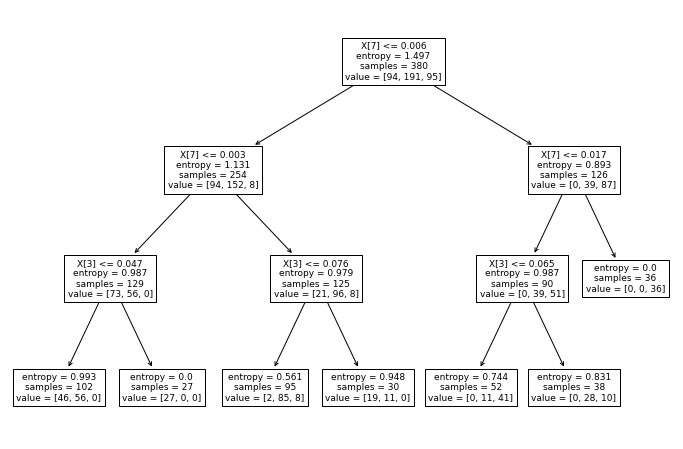

In [ ]:
#Visualize decision-trees

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train_cp, y_train)) 

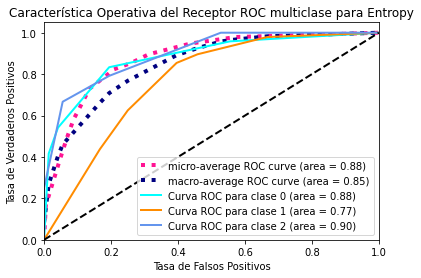

In [ ]:

probabilidad = clf_en.predict_proba(x_test_cp)
grafica_roc_multiclase (y_test, probabilidad,  lista_etiquetas, 'Entropy')

In [ ]:
import pickle
# Lets dump our rf_model
pickle.dump(clf_en, open('entropy.pkl','wb'))

Bibliografia
https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

## 3.6.-Random Forest Classification

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

best_model_rf = RFECV(clf, step=1)


In [ ]:
# Fit randomized search
best_model_rf = clf.fit(x_train_cp, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 24.3min finished


In [ ]:
acc = best_model_rf.score(x_test_cp,y_test)*100
accuracies['rf'] = acc
print("Test Accuracy of Logistict Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistict Tunned Algorithm: 78.12%


In [ ]:
#los mejores parametros
best_model_rf.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 600}

In [ ]:
print( classification_report(y_test, best_model_rf.best_estimator_.predict(x_test_cp)) )

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.75      0.85      0.80        48
           2       0.82      0.75      0.78        24

    accuracy                           0.78        96
   macro avg       0.80      0.76      0.77        96
weighted avg       0.79      0.78      0.78        96



Para sacar los features (característias) importantes

https://github.com/scikit-learn/scikit-learn/issues/4945

In [ ]:
# get importance
importances = best_model_rf.best_estimator_.feature_importances_

# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train_cp.columns), 'importance':importances})
df_imp.sort_values('importance', ascending=False,inplace=True)
df_imp[df_imp.importance >= 0.01 ].head(30)

,feature,importance
7,Rate,0.482481
3,CPM (cost per 1000 impressions),0.144129
0,Month,0.073993
5,NumMessage,0.059124
6,NumCaption,0.045284
4,NumDescripcion,0.037011
21,type_35-44,0.015578
20,type_25-34,0.014139
19,type_18-24,0.013429
2,Targeting maximum age,0.012905


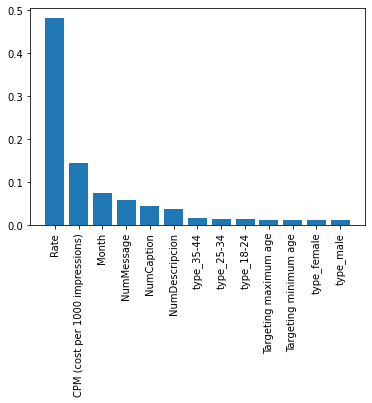

In [ ]:
# plot feature importance
plt.bar(df_imp[df_imp.importance >= 0.01 ].feature,df_imp[df_imp.importance >= 0.01 ].importance)
plt.xticks(rotation=90)
plt.show()

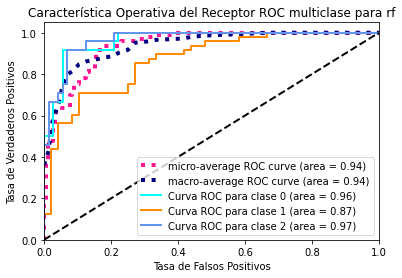

In [ ]:
rf_model = best_model_rf.best_estimator_
lista_etiquetas = best_model_rf.best_estimator_.classes_

probabilidad = rf_model.predict_proba(x_test_cp)
grafica_roc_multiclase (y_test, probabilidad,  lista_etiquetas, 'rf')



In [ ]:
import pickle
# Lets dump our rf_model
pickle.dump(rf_model, open('rf.pkl','wb'))

## 3.7.-GBM Gradient Boosting (Clasificador)

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
hyperparameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 2,12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
}



In [ ]:
cv


RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123)

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
#clf = RandomizedSearchCV(estimator = gbc, param_distributions = hyperparameters, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
clf = GridSearchCV(estimator = gbc, param_grid= hyperparameters,  cv=cv, n_jobs=-1)

In [ ]:
# Fit randomized search
best_model_gbc = clf.fit(x_train_cp, y_train)

In [ ]:
best_model_gbc.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 10,
 'subsample': 0.95}

In [ ]:
acc = best_model_gbc.score(x_test_cp,y_test)*100
accuracies['gbc'] = acc
print("Test Accuracy of Logistict Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of Logistict Tunned Algorithm: 71.88%


In [ ]:
#los mejores parametros
best_model_gbc.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 10,
 'subsample': 0.95}

In [ ]:
# get importance
importances = best_model_gbc.best_estimator_.feature_importances_

# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train_cp.columns), 'importance':importances})
df_imp.sort_values('importance', ascending=False,inplace=True)
df_imp[df_imp.importance >= 0.01 ].head(30)

,feature,importance
7,Rate,0.764684
6,NumCaption,0.060042
0,Month,0.051253
3,CPM (cost per 1000 impressions),0.037559
5,NumMessage,0.029341


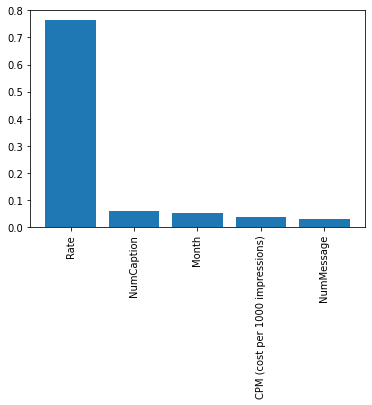

In [ ]:
# plot feature importance
plt.bar(df_imp[df_imp.importance >= 0.01 ].feature,df_imp[df_imp.importance >= 0.01 ].importance)
plt.xticks(rotation=90)
plt.show()

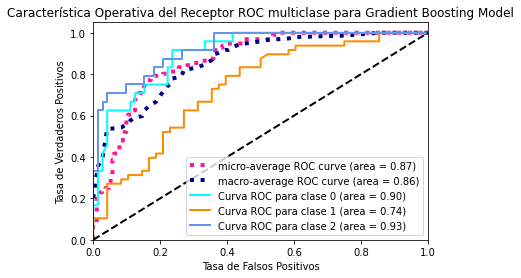

In [ ]:
gbc = best_model_gbc.best_estimator_
probabilidad = gbc.predict_proba(x_test_cp)
grafica_roc_multiclase (y_test, probabilidad,  lista_etiquetas, 'Gradient Boosting Model')

In [ ]:
# para version 3.8 windows
# https://www.codegrepper.com/code-examples/python/how+to+install+pickle+in+python+3.8
import pickle
# Lets dump our rf_model
pickle.dump(gbc, open('gbc.pkl','wb'))

## 3.8.-Keras

In [ ]:
import tensorflow as tf
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(x_train_cp.keys())]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

neural_model = build_model()


In [ ]:
neural_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 208       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Keeping EPOCHs high as dataset is small.
EPOCHS = 100
neural_pred = neural_model.fit(x_train_cp, y_train,epochs=EPOCHS, validation_split=0.1, verbose=2)

Epoch 1/100
11/11 - 1s - loss: 0.6367 - accuracy: 0.4971 - val_loss: 0.5703 - val_accuracy: 0.5526
Epoch 2/100
11/11 - 0s - loss: 0.4599 - accuracy: 0.4971 - val_loss: 0.3566 - val_accuracy: 0.5526
Epoch 3/100
11/11 - 0s - loss: 0.1759 - accuracy: 0.4971 - val_loss: 0.1991 - val_accuracy: 0.5526
Epoch 4/100
11/11 - 0s - loss: 0.0651 - accuracy: 0.4971 - val_loss: 0.2284 - val_accuracy: 0.5526
Epoch 5/100
11/11 - 0s - loss: 0.0128 - accuracy: 0.4971 - val_loss: 0.2421 - val_accuracy: 0.5526
Epoch 6/100
11/11 - 0s - loss: -3.7292e-02 - accuracy: 0.4971 - val_loss: 0.2633 - val_accuracy: 0.5526
Epoch 7/100
11/11 - 0s - loss: -8.9462e-02 - accuracy: 0.4971 - val_loss: 0.2610 - val_accuracy: 0.5526
Epoch 8/100
11/11 - 0s - loss: -1.7491e-01 - accuracy: 0.4971 - val_loss: 0.2693 - val_accuracy: 0.5526
Epoch 9/100
11/11 - 0s - loss: -3.1381e-01 - accuracy: 0.4971 - val_loss: 0.3608 - val_accuracy: 0.5526
Epoch 10/100
11/11 - 0s - loss: -5.3052e-01 - accuracy: 0.4971 - val_loss: 0.3796 - val_a

In [ ]:
_, acc = neural_model.evaluate(x_test_cp, y_test,
                            batch_size=64)
acc = acc *100
accuracies['Keras'] = acc
print("Keras Algorithm Accuracy Score : {:.2f}%".format(acc))

2/2 [==============================] - 0s 5ms/step - loss: -303500.2188 - accuracy: 0.5000
Keras Algorithm Accuracy Score : 50.00%


Plot of a ROC

In [ ]:
prediccion  = neural_pred.model.predict(x_test_cp, batch_size=32, verbose=0)

In [ ]:
np.reshape(prediccion,96)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
x_test_cp.shape

(96, 25)

## 3.8.-LightGBM

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score

In [ ]:
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=10
params['num_class']=3 #no.of unique values in the target class not inclusive of the end value

In [ ]:
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(x_train_cp, label=y_train)

In [ ]:
clf=lgb.train(params,d_train,100)  #training the model on 100 epocs


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 380, number of used features: 24
[LightGBM] [Info] Start training from score -1.396876
[LightGBM] [Info] Start training from score -0.687898
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
#prediction on the test dataset
probabilidad=clf.predict(x_test_cp)
probabilidad[1]

array([0.0151906 , 0.68066905, 0.30414035])

In [ ]:
#argmax() method 
y_pred_lgbm = [np.argmax(line) for line in y_pred_1]
type(y_pred_lgbm)

list

In [ ]:
lgbm = clf

In [281]:
#acc = best_model_gbc.score(x_test_cp,y_test)*100
#using precision score for error metrics
acc = precision_score(y_pred_lgbm,y_test,average=None).mean() *100
accuracies['lgm'] = acc
print("Test Accuracy of LGBM Tunned Algorithm: {:.2f}%".format(acc))

Test Accuracy of LGBM Tunned Algorithm: 78.47%


In [ ]:
# para version 3.8 windows
# https://www.codegrepper.com/code-examples/python/how+to+install+pickle+in+python+3.8
import pickle
# Lets dump our rf_model
pickle.dump(lgbm, open('lgbm.pkl','wb'))

# 7.- Comparacion de modelos y eleccion del mejor

             Accuracies      Value
12                  lgm  78.472222
10                   rf  78.125000
9               entropy  72.916667
0                   gbc  71.875000
7                  tree  69.791667
8    Decision Tree gini  69.791667
6                    nb  58.333333
4                   svm  55.208333
1   Logistic Regression  54.166667
3         best_model_lg  52.083333
2                  enet  51.041667
11                Keras  50.000000
5                   knn  48.958333


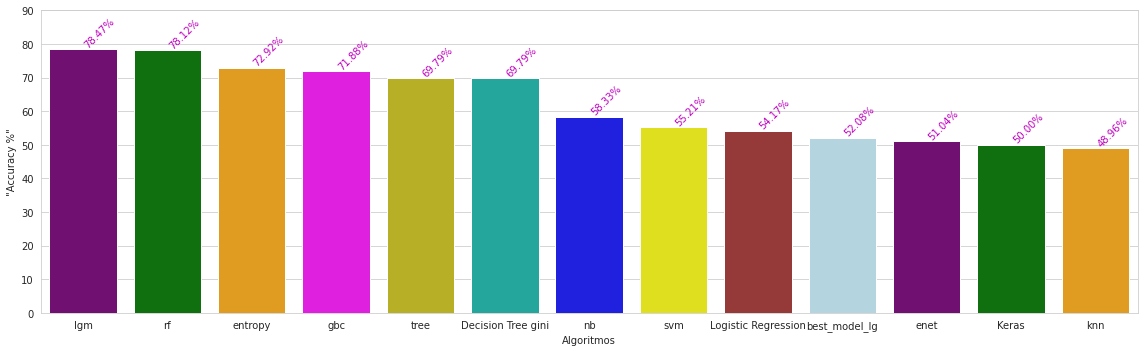

In [282]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","blue","yellow","brown","lightblue"]

#pasarlo el diccionario a pandas para manejarlo mejor
pd_df = pd.DataFrame(list(accuracies.items()))
pd_df.columns =["Accuracies","Value"]
pd_df.sort_values('Value', ascending=False,inplace=True)
print (pd_df)


sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
ax = sns.barplot(x=pd_df['Accuracies'], y=pd_df['Value'], palette=colors)
ax.set(xlabel="Algoritmos", ylabel='"Accuracy %"')
ax.set_xticklabels(pd_df.Accuracies)
plt.yticks(np.arange(0,100,10))
for i, v in enumerate(pd_df["Value"].iteritems()):        
    ax.text(i ,v[1], "{:.2f}%".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
#{:.2f}%
plt.show()

8.- Matrix de confusion 

In [ ]:
# Predicted values
y_head_lr = lr.predict(x_test_cp)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train_cp, y_train)
y_head_knn = knn3.predict(x_test_cp)
y_head_svm = svm.predict(x_test_cp)
y_head_nb = nb.predict(x_test_cp)
y_head_dtc = dtc.predict(x_test_cp)
y_head_rf = rf.predict(x_test_cp)


NotFittedError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


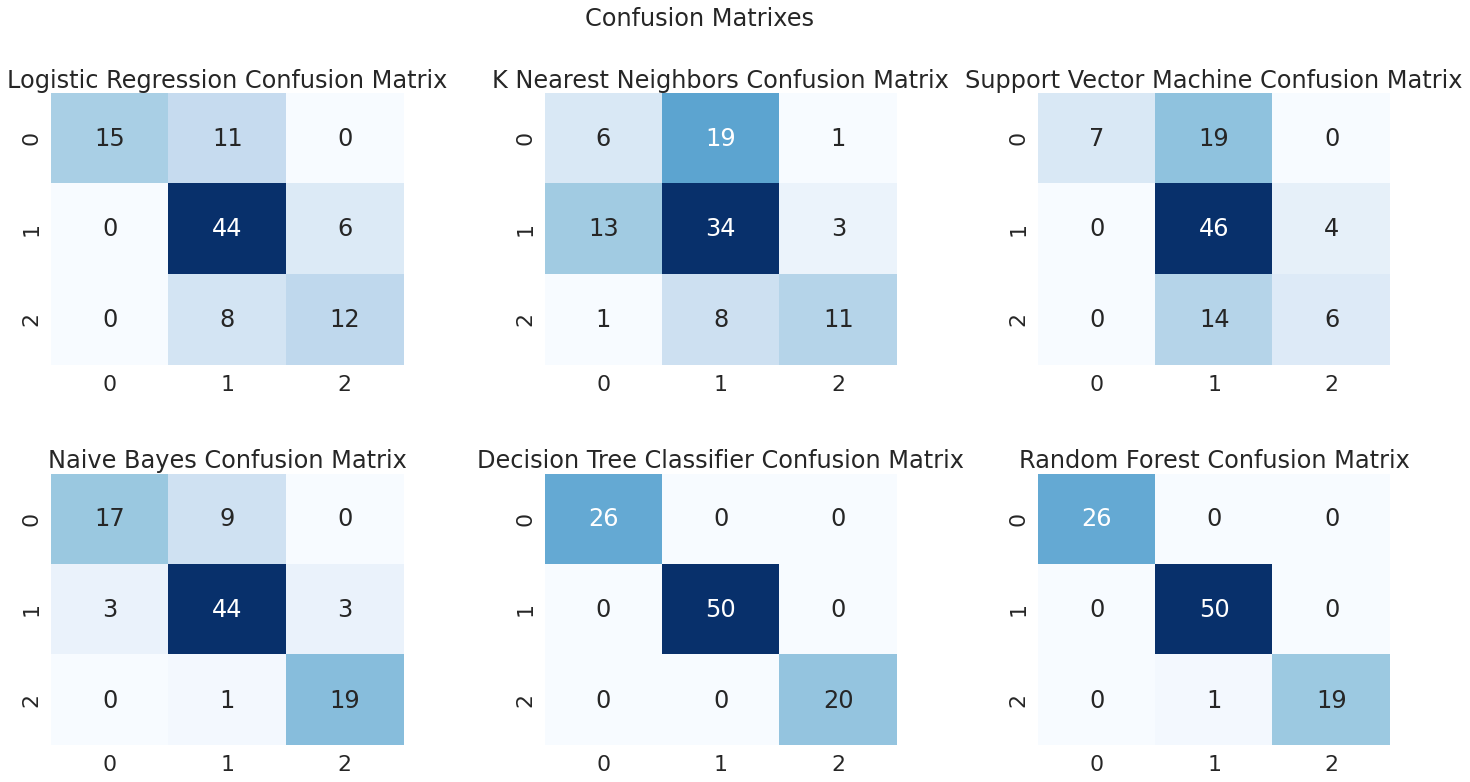

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

# 9.- Mejor modelo (Randon Forest)


## K Fold Cross Validation (Randon Forest)

https://www.kaggle.com/niklasdonges/end-to-end-project-with-python

In [ ]:
from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf_model, x_train, y_train, cv=10, scoring = "accuracy")

In [ ]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

## Feature Importance (Randon Forest)


https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [ ]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances.head(20)

,importance
feature,
Cost per on-Facebook lead,0.446
Cost,0.119
Rate,0.103
Reach,0.077
Impressions,0.070
Link clicks,0.042
Unique leads,0.029
CTR,0.027
Month,0.022


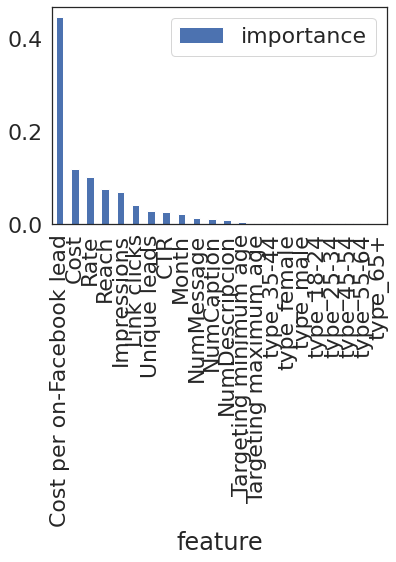

In [ ]:
importances.plot.bar()

In [ ]:
variables= ['Cost per on-Facebook lead','Targeting minimum age', 'Targeting maximum age', 'type_female', 'type_male', 'type_18-24', 'type_25-34',
       'type_35-44', 'type_45-54', 'type_55-64', 'type_65+']
x_train_t = x_train.drop(variables, axis=1)
x_test_t= x_test.drop(variables, axis=1)


In [ ]:
# Training random forest again:

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(x_train_t, y_train)
Y_prediction = random_forest.predict(x_test_t)


random_forest.score(x_train_t, y_train)


acc_random_forest = round(random_forest.score(x_train_t, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")


100.0 %


In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 98.95 %


## Hyperparameter Tuning

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train_t, y_train)
Y_prediction = random_forest.predict(x_test_t)

random_forest.score(x_train_t, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 98.16 %


## Further Evaluation

In [ ]:
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, x_train_t, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 90,   2,   0],
       [  0, 187,   2],
       [  0,   3,  96]])

In [ ]:
predictions 

In [ ]:
#Precision and Recal
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions,average=None))
print("Recall:",recall_score(y_train, predictions, average=None))

Precision: [1.         0.97395833 0.97959184]
Recall: [0.97826087 0.98941799 0.96969697]


In [ ]:
# F-Score
from sklearn.metrics import f1_score
f1_score(y_train, predictions, average=None)

array([0.98360656, 0.97894737, 0.97461929])

In [ ]:
#Precision Recall Curv
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(x_train_t)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)